<a href="https://colab.research.google.com/github/Renee0330/bob_study_allFiles/blob/main/untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load data and package

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

ttswing = pd.read_csv("/content/assignTTSWING.csv")

In [3]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300): # resolution-分辨率
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()                      # tight_layout自动调整子图的参数，使其填充整个图像区域，避免标签重叠。
  plt.savefig(path, format=fig_extension, dpi=resolution)    # 将绘制的图形保存到指定路径path。format指定文件格式，例如"png"、"pdf"、"svg"等,dpi设置图像分辨率

In [4]:
ttswing.head()

id        date  testmode  teststage  fileindex  count      ax_mean  \
0  10  16/09/2019         0          0          1      1   925.058824   
1  10  16/09/2019         0          0          1      2  -420.058824   
2  10  16/09/2019         0          0          1      3 -5324.764706   
3  10  16/09/2019         0          0          1      4 -6434.882353   
4  10  16/09/2019         0          0          1      5 -7145.823529   

       ay_mean      az_mean      gx_mean  ...   age  playYears  height  \
0 -1719.529412 -2741.764706   -58.470588  ...  high       high    high   
1 -2501.411765 -2608.529412  -891.470588  ...  high       high    high   
2 -7701.882353  -214.411765    -7.117647  ...  high       high    high   
3 -8840.352941   813.764706  1114.588235  ...  high       high    high   
4 -9002.000000   927.294118  1308.411765  ...  high       high    high   

   weight  handedness  holdRacketHanded        newv1         newv2  \
0    high           1                 1   421.109759 -21236.863980   
1    high           1                 1 -1340.472006 -15733.522790   
2    high           1                 1   278.372915 -29621.363390   
3    high           1                 1 -4145.137261  -6453.712061   
4    high           1                 1  3424.124762  -4445.275490   

         newv3  newv4  
0 -1877.217617     13  
1 -1544.658523     49  
2 -1741.090494     47  
3 -1707.213870     13  
4 -1601.290904      9  

[5 rows x 51 columns]

In [5]:
ttswing = ttswing.drop(['id', 'date', 'fileindex', 'count', 'teststage'], axis = 1)

In [6]:
ttswing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97355 entries, 0 to 97354
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   testmode          97355 non-null  int64  
 1   ax_mean           97355 non-null  float64
 2   ay_mean           97355 non-null  float64
 3   az_mean           97355 non-null  float64
 4   gx_mean           97355 non-null  float64
 5   gy_mean           97355 non-null  float64
 6   gz_mean           97355 non-null  float64
 7   ax_var            97355 non-null  float64
 8   ay_var            97355 non-null  float64
 9   az_var            97355 non-null  float64
 10  gx_var            97355 non-null  float64
 11  gy_var            97355 non-null  float64
 12  gz_var            97355 non-null  float64
 13  ax_rms            97355 non-null  float64
 14  ay_rms            97355 non-null  float64
 15  az_rms            97355 non-null  float64
 16  gx_rms            97355 non-null  float6

In [7]:
ttswing["age"].unique()

array(['high', 'medium', '???', 'low'], dtype=object)

In [8]:
ttswing["playYears"].unique()

array(['high', 'medium', '???', 'low'], dtype=object)

In [9]:
ttswing["height"].unique()

array(['high', 'low', 'medium', '???'], dtype=object)

In [10]:
ttswing["testmode"].unique()

array([0, 1, 2])

In [11]:
# 清除异常值（'???'）所在的行
for col in ['age', 'height', 'weight', 'playYears']:
    if col in ttswing.columns:
        ttswing = ttswing[ttswing[col] != '???']

In [12]:
# Categorical Variable Encoding age / playYears/ height / weight
order_map = {'low': 0, 'medium': 1, 'high': 2}
ttswing['age'] = ttswing['age'].map(order_map)
ttswing['playYears'] = ttswing['playYears'].map(order_map)
ttswing['height'] = ttswing['height'].map(order_map)
ttswing['weight'] = ttswing['weight'].map(order_map)

In [13]:
ttswing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97350 entries, 0 to 97354
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   testmode          97350 non-null  int64  
 1   ax_mean           97350 non-null  float64
 2   ay_mean           97350 non-null  float64
 3   az_mean           97350 non-null  float64
 4   gx_mean           97350 non-null  float64
 5   gy_mean           97350 non-null  float64
 6   gz_mean           97350 non-null  float64
 7   ax_var            97350 non-null  float64
 8   ay_var            97350 non-null  float64
 9   az_var            97350 non-null  float64
 10  gx_var            97350 non-null  float64
 11  gy_var            97350 non-null  float64
 12  gz_var            97350 non-null  float64
 13  ax_rms            97350 non-null  float64
 14  ay_rms            97350 non-null  float64
 15  az_rms            97350 non-null  float64
 16  gx_rms            97350 non-null  float64
 17

In [14]:
ttswing.describe()

testmode       ax_mean       ay_mean       az_mean       gx_mean  \
count  97350.000000  97350.000000  97350.000000  97350.000000  97350.000000   
mean       1.087314  -2921.554944   -218.364096  -1641.077904    818.021538   
std        0.483504   2845.660647   3992.108815   1479.335650   1438.081677   
min        0.000000 -25557.500000 -16872.000000 -10112.400000 -16558.250000   
25%        1.000000  -3738.118750  -3225.783134  -2787.455592    226.960526   
50%        1.000000  -2709.572650   -466.571429  -1922.574468   1027.818182   
75%        1.000000  -1716.408577   2777.772604   -641.714096   1620.734923   
max        2.000000  15096.470590  25487.333330  11210.000000  15170.333330   

            gy_mean       gz_mean        ax_var        ay_var        az_var  \
count  97350.000000  97350.000000  97350.000000  97350.000000  97350.000000   
mean     -77.562524    -57.528464   3384.206146   3315.954533   2396.696038   
std     1495.235627   1842.687821   2025.664184   1927.081238   1428.216468   
min   -17013.000000 -23411.333330      0.000000      0.500000      0.000000   
25%    -1069.756250   -494.062802   2089.742677   2193.647439   1625.818586   
50%      239.728354    -49.044415   2977.596843   2921.452500   2135.326186   
75%      831.422866    415.743056   4165.302178   3868.011843   2752.205016   
max    18125.333330  13847.666670  14858.874050  15076.552130  14664.842070   

       ...           age     playYears        height        weight  \
count  ...  97350.000000  97350.000000  97350.000000  97350.000000   
mean   ...      0.910118      1.020031      1.016949      0.976888   
std    ...      0.674306      0.675428      0.761979      0.789626   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      1.000000      0.000000      0.000000   
50%    ...      1.000000      1.000000      1.000000      1.000000   
75%    ...      1.000000      1.000000      2.000000      2.000000   
max    ...      2.000000      2.000000      2.000000      2.000000   

         handedness  holdRacketHanded         newv1         newv2  \
count  97350.000000      97350.000000  97350.000000  97350.000000   
mean       0.834617          0.834617  -2922.947928   -209.875197   
std        0.371527          0.371527   2845.595229  20005.581362   
min        0.000000          0.000000 -16335.369190 -94104.184950   
25%        1.000000          1.000000  -4844.270887 -13692.475310   
50%        1.000000          1.000000  -2919.234540   -145.631913   
75%        1.000000          1.000000   -991.724395  13191.461275   
max        1.000000          1.000000  10906.689750  88867.512180   

              newv3         newv4  
count  97350.000000  97350.000000  
mean   -1641.378054     32.060370  
std      147.855853     18.193022  
min    -2332.549823      1.000000  
25%    -1740.661023     16.000000  
50%    -1641.315624     32.000000  
75%    -1542.247486     48.000000  
max    -1008.536190     63.000000  

[8 rows x 46 columns]

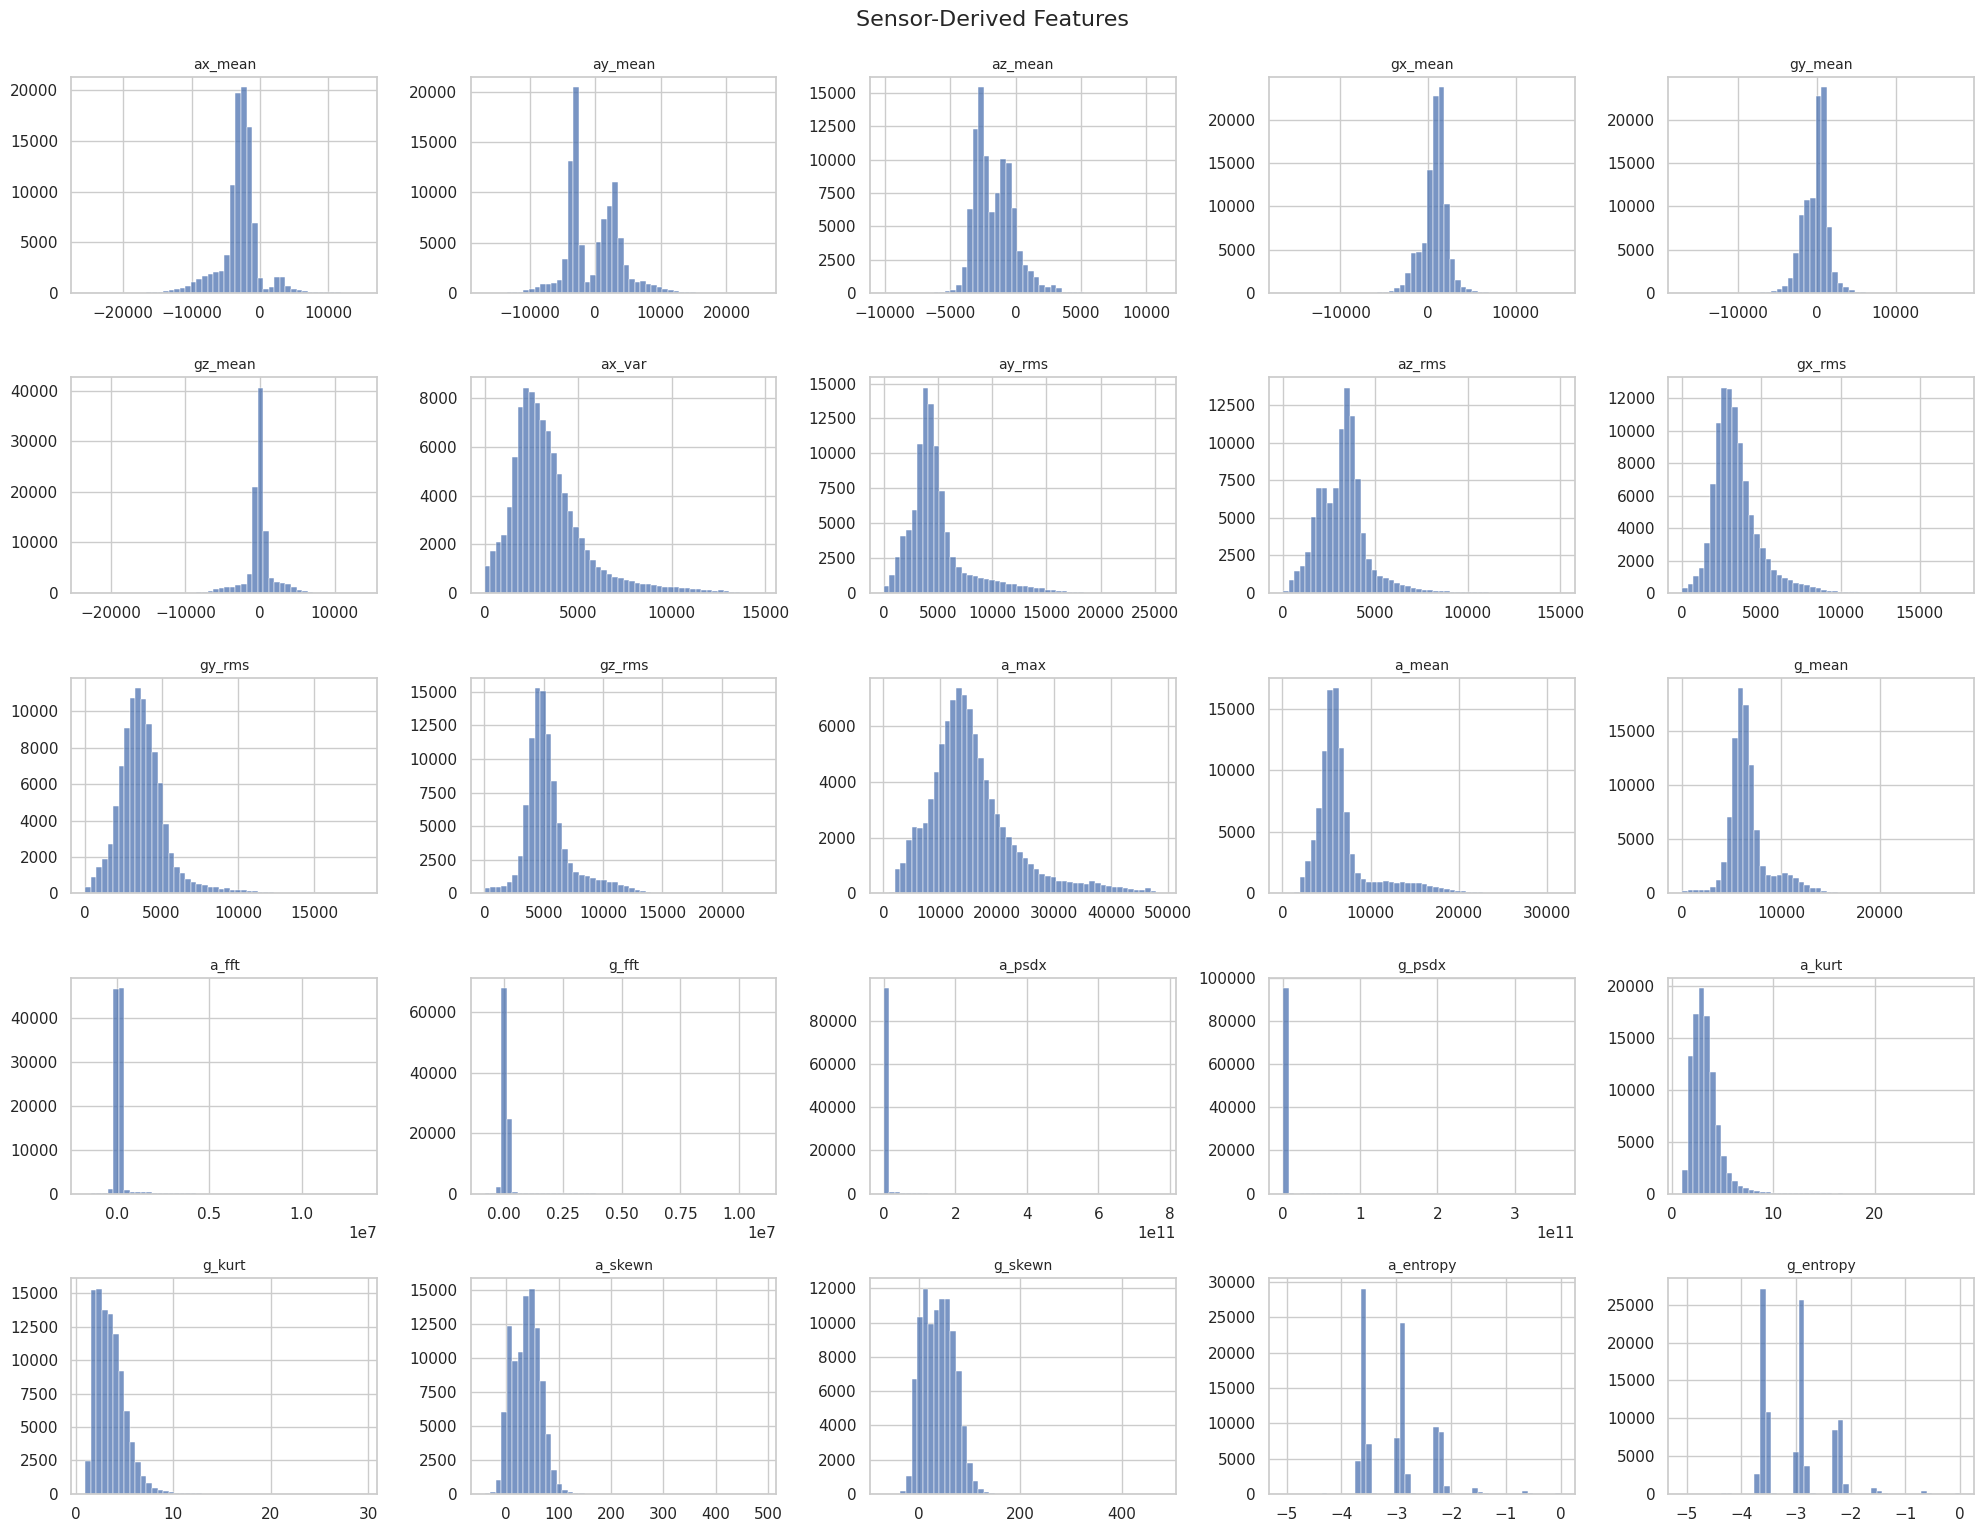

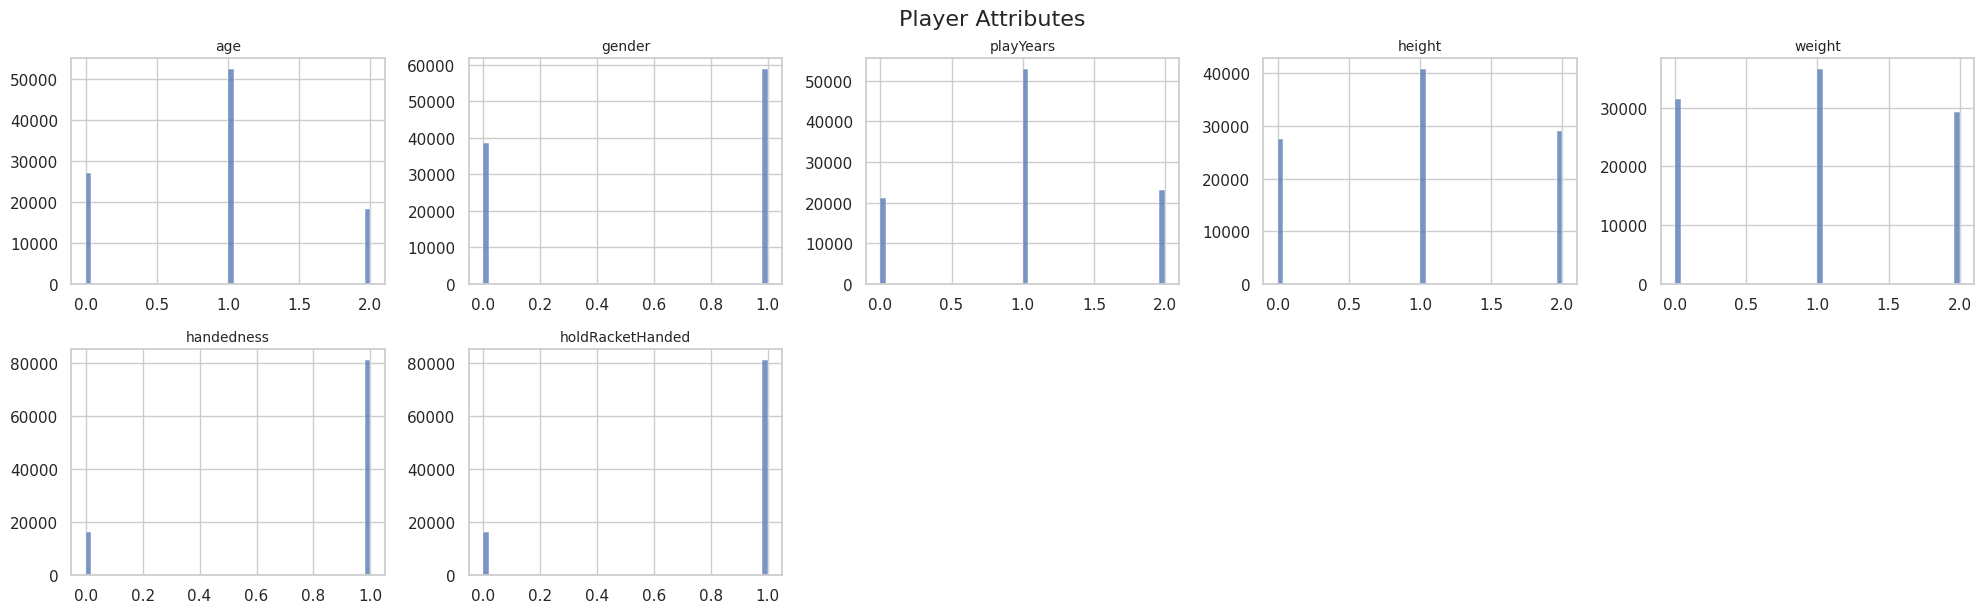

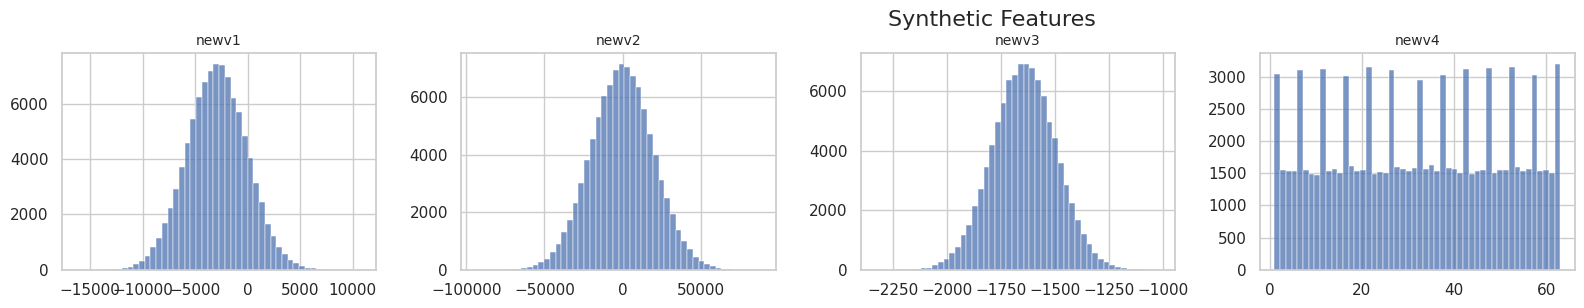

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sensor_features = ['ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean',
                   'ax_var', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
                   'a_max', 'a_mean', 'g_mean', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
                   'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy']

player_features = ['age', 'gender', 'playYears', 'height', 'weight', 'handedness', 'holdRacketHanded']

engineered_features = ['newv1', 'newv2', 'newv3', 'newv4']

# 设置风格
sns.set(style="whitegrid")

# 绘图
def plot_histograms(columns, title, df, bins=50):
    n = len(columns)
    cols = 5
    rows = n // cols + (n % cols > 0)
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i+1)
        sns.histplot(df[col], kde=False, bins=bins)
        plt.title(col, fontsize=10)
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

# 分别画图
plot_histograms(sensor_features, 'Sensor-Derived Features', ttswing)
plot_histograms(player_features, 'Player Attributes', ttswing)
plot_histograms(engineered_features, 'Synthetic Features', ttswing)

## heatmap

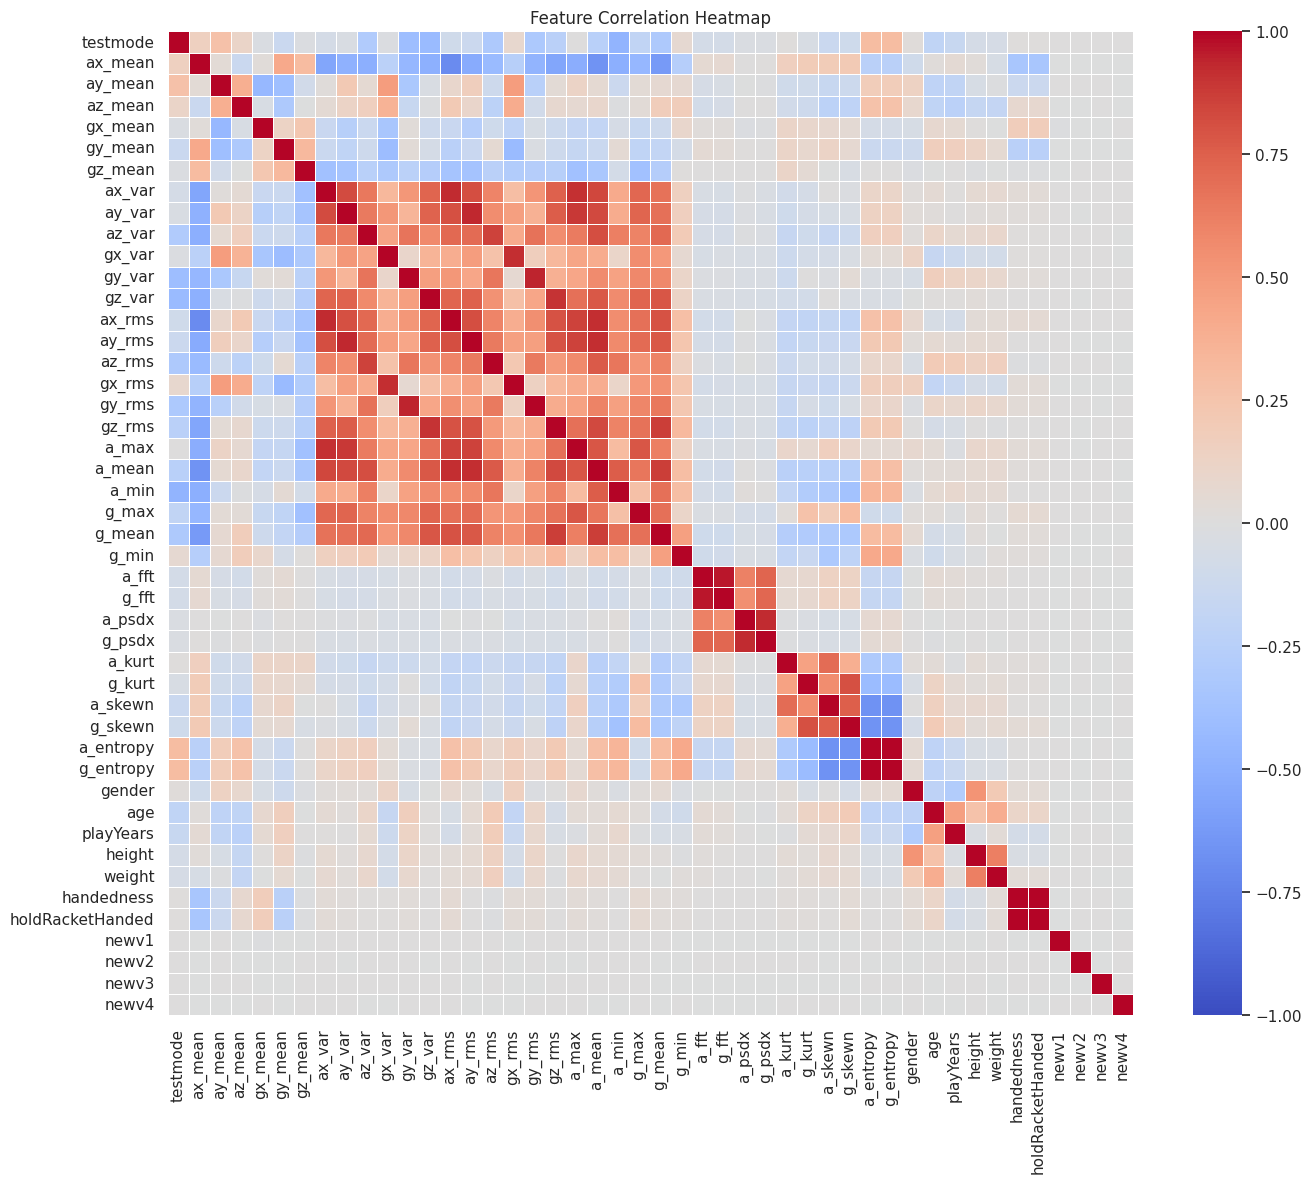

     Feature 1         Feature 2  Correlation
0       ax_var            ax_rms     0.922520
1       ax_var             a_max     0.906908
2       ay_var            ay_rms     0.937478
3       gx_var            gx_rms     0.915708
4       gy_var            gy_rms     0.940311
5       gz_var            gz_rms     0.904649
6       ax_rms            a_mean     0.914764
7       ay_rms            a_mean     0.915796
8        a_fft             g_fft     0.964757
9       a_psdx            g_psdx     0.924898
10   a_entropy         g_entropy     0.996128
11  handedness  holdRacketHanded     1.000000


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 计算相关系数矩阵
corr_matrix = ttswing.corr()
# 绘制相关性热图
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=False,
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1,)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
# 设置阈值
threshold = 0.90
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 找出高度相关的变量对
high_corr_pairs = [(row, col, upper_tri.loc[row, col])
                   for row in upper_tri.index
                   for col in upper_tri.columns
                   if abs(upper_tri.loc[row, col]) > threshold]
# 输出为 DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df)

In [17]:
ttswing = ttswing.drop(['ax_var', 'ay_var', 'ay_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms', 'g_fft', 'g_psdx', 'g_entropy', 'handedness'], axis = 1)

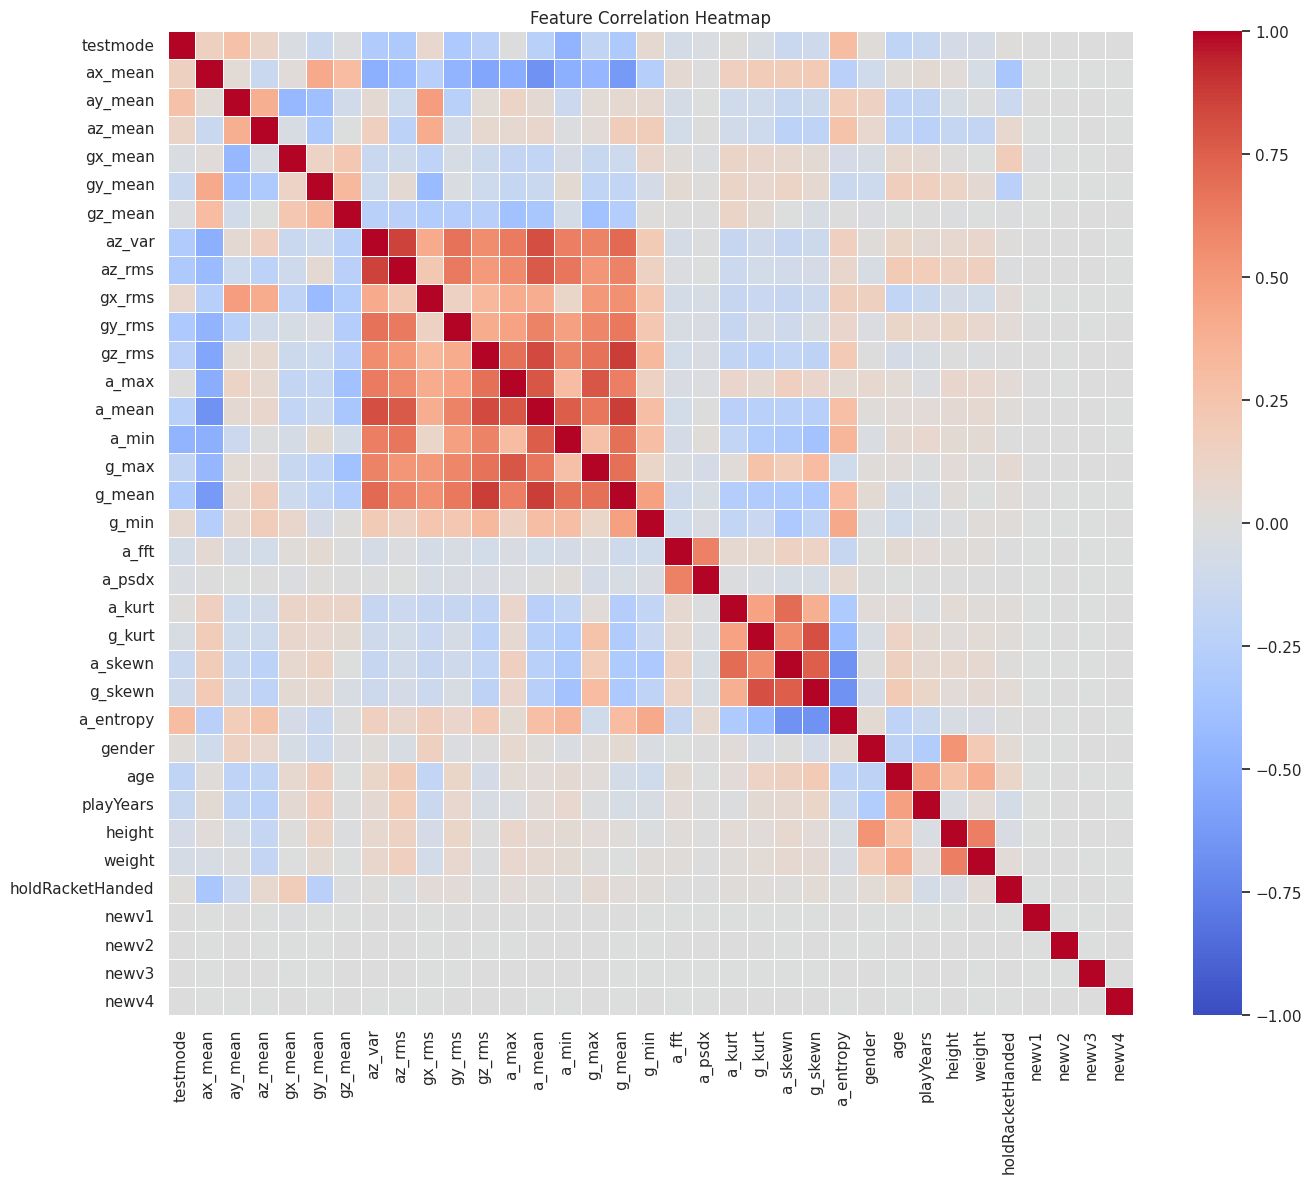

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [18]:
# 计算相关系数矩阵
corr_matrix = ttswing.corr()
# 绘制相关性热图
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=False,
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1,)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
# 设置阈值
threshold = 0.90
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 找出高度相关的变量对
high_corr_pairs = [(row, col, upper_tri.loc[row, col])
                   for row in upper_tri.index
                   for col in upper_tri.columns
                   if abs(upper_tri.loc[row, col]) > threshold]
# 输出为 DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df)

## Mutual Information

In [19]:
ttswing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97350 entries, 0 to 97354
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   testmode          97350 non-null  int64  
 1   ax_mean           97350 non-null  float64
 2   ay_mean           97350 non-null  float64
 3   az_mean           97350 non-null  float64
 4   gx_mean           97350 non-null  float64
 5   gy_mean           97350 non-null  float64
 6   gz_mean           97350 non-null  float64
 7   az_var            97350 non-null  float64
 8   az_rms            97350 non-null  float64
 9   gx_rms            97350 non-null  float64
 10  gy_rms            97350 non-null  float64
 11  gz_rms            97350 non-null  float64
 12  a_max             97350 non-null  float64
 13  a_mean            97350 non-null  float64
 14  a_min             97350 non-null  float64
 15  g_max             97350 non-null  float64
 16  g_mean            97350 non-null  float64
 17

In [20]:
ttswing['testmode'].unique()

array([0, 1, 2])

In [21]:
from sklearn.model_selection import train_test_split

X = ttswing.drop(columns=['testmode'])
y = ttswing['testmode']

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [22]:
y_train.unique()

array([0, 2, 1])

In [23]:
X_train

ax_mean      ay_mean      az_mean      gx_mean      gy_mean  \
9675  -7173.083333 -9248.166667  -924.000000   822.333333  1604.958333   
92513 -9569.421053 -6363.473684    -7.157895 -3467.842105  3014.578947   
18466 -2061.317073 -3345.365854 -2319.170732  1976.121951  1027.317073   
23669 -2955.425000 -1980.350000 -2320.750000  1182.650000    29.450000   
51344 -8882.300000  8821.100000 -1683.500000  1083.950000 -3307.750000   
...            ...          ...          ...          ...          ...   
44456 -2409.333333 -3422.145833 -3701.458333  1038.729167  1258.958333   
38895 -1058.125000 -2473.775000 -2620.800000  1395.625000   255.875000   
1876  -1899.822222 -3688.600000 -2817.844444   770.688889   408.266667   
44301 -2389.958333  3223.291667 -1822.062500  -975.937500   845.479167   
61727 -3146.743590  1265.102564 -1258.410256  2028.897436 -2743.948718   

           gz_mean       az_var       az_rms       gx_rms       gy_rms  ...  \
9675    660.583333  8033.480166  8086.444187  5432.028726  8597.594477  ...   
92513 -4439.421053  5489.196147  5489.200814  5129.509646  5913.197572  ...   
18466   -15.341463  1487.038716  2754.965884  3694.657134  4577.373920  ...   
23669  1233.800000  1275.240914  2648.040776  2408.505792  5285.760693  ...   
51344 -3903.800000  5057.179693  5330.031773  5837.645189  4394.229563  ...   
...            ...          ...          ...          ...          ...  ...   
44456   113.250000  3290.340275  4952.487548  2775.286866  2567.212861  ...   
38895  -237.625000  2586.483348  3682.185323  2275.834742  4429.474989  ...   
1876   -425.866667  2681.343121  3889.710560  2947.860818  4163.088090  ...   
44301   911.125000  2678.375381  3239.383651  2700.508436  3277.997868  ...   
61727   200.384615  2606.603948  2894.474134  3832.360694  4804.219022  ...   

       gender  age  playYears  height  weight  holdRacketHanded        newv1  \
9675        1    2          1       2       2                 1  2469.952033   
92513       0    1          1       0       0                 0 -2201.941554   
18466       1    0          0       1       0                 0 -2653.311222   
23669       1    0          1       1       0                 1 -3324.196484   
51344       0    0          1       0       0                 1  -699.126084   
...       ...  ...        ...     ...     ...               ...          ...   
44456       0    1          1       1       2                 1  -772.027218   
38895       0    1          1       1       1                 1 -5267.197428   
1876        1    1          1       2       1                 1 -2249.095671   
44301       1    1          1       2       2                 1 -4305.085153   
61727       1    1          0       1       2                 1 -4154.251655   

              newv2        newv3  newv4  
9675  -22662.773570 -1491.499850     56  
92513 -10749.712350 -1726.042075     46  
18466  43981.338740 -1818.607636     46  
23669 -26903.184890 -1584.778378     39  
51344   5583.497982 -1657.223023     61  
...             ...          ...    ...  
44456   3133.375645 -1676.146122     61  
38895  -9258.819591 -1813.363257      9  
1876  -20099.179250 -1803.750461     23  
44301  23141.265420 -1829.495743     52  
61727   3649.842066 -1468.111363      9  

[77880 rows x 34 columns]

In [24]:
df = X_train

# 1. 检查是否存在缺失值
has_nan = df.isnull().values.any()
print(f"是否存在缺失值: {has_nan}")

# 2. 各列缺失值数量
missing_per_column = df.isnull().sum()
print("\n每列的缺失值数量：")
print(missing_per_column[missing_per_column > 0])  # 只显示有缺失的列

# 3. 缺失值总数
total_missing = missing_per_column.sum()
print(f"\n总缺失值个数：{total_missing}")

# 4. 缺失值比例（可选）
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("\n缺失值比例（按列）：")
print(missing_ratio[missing_ratio > 0])

是否存在缺失值: False

每列的缺失值数量：
Series([], dtype: int64)

总缺失值个数：0

缺失值比例（按列）：
Series([], dtype: float64)


In [25]:
# 导入必要的库
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

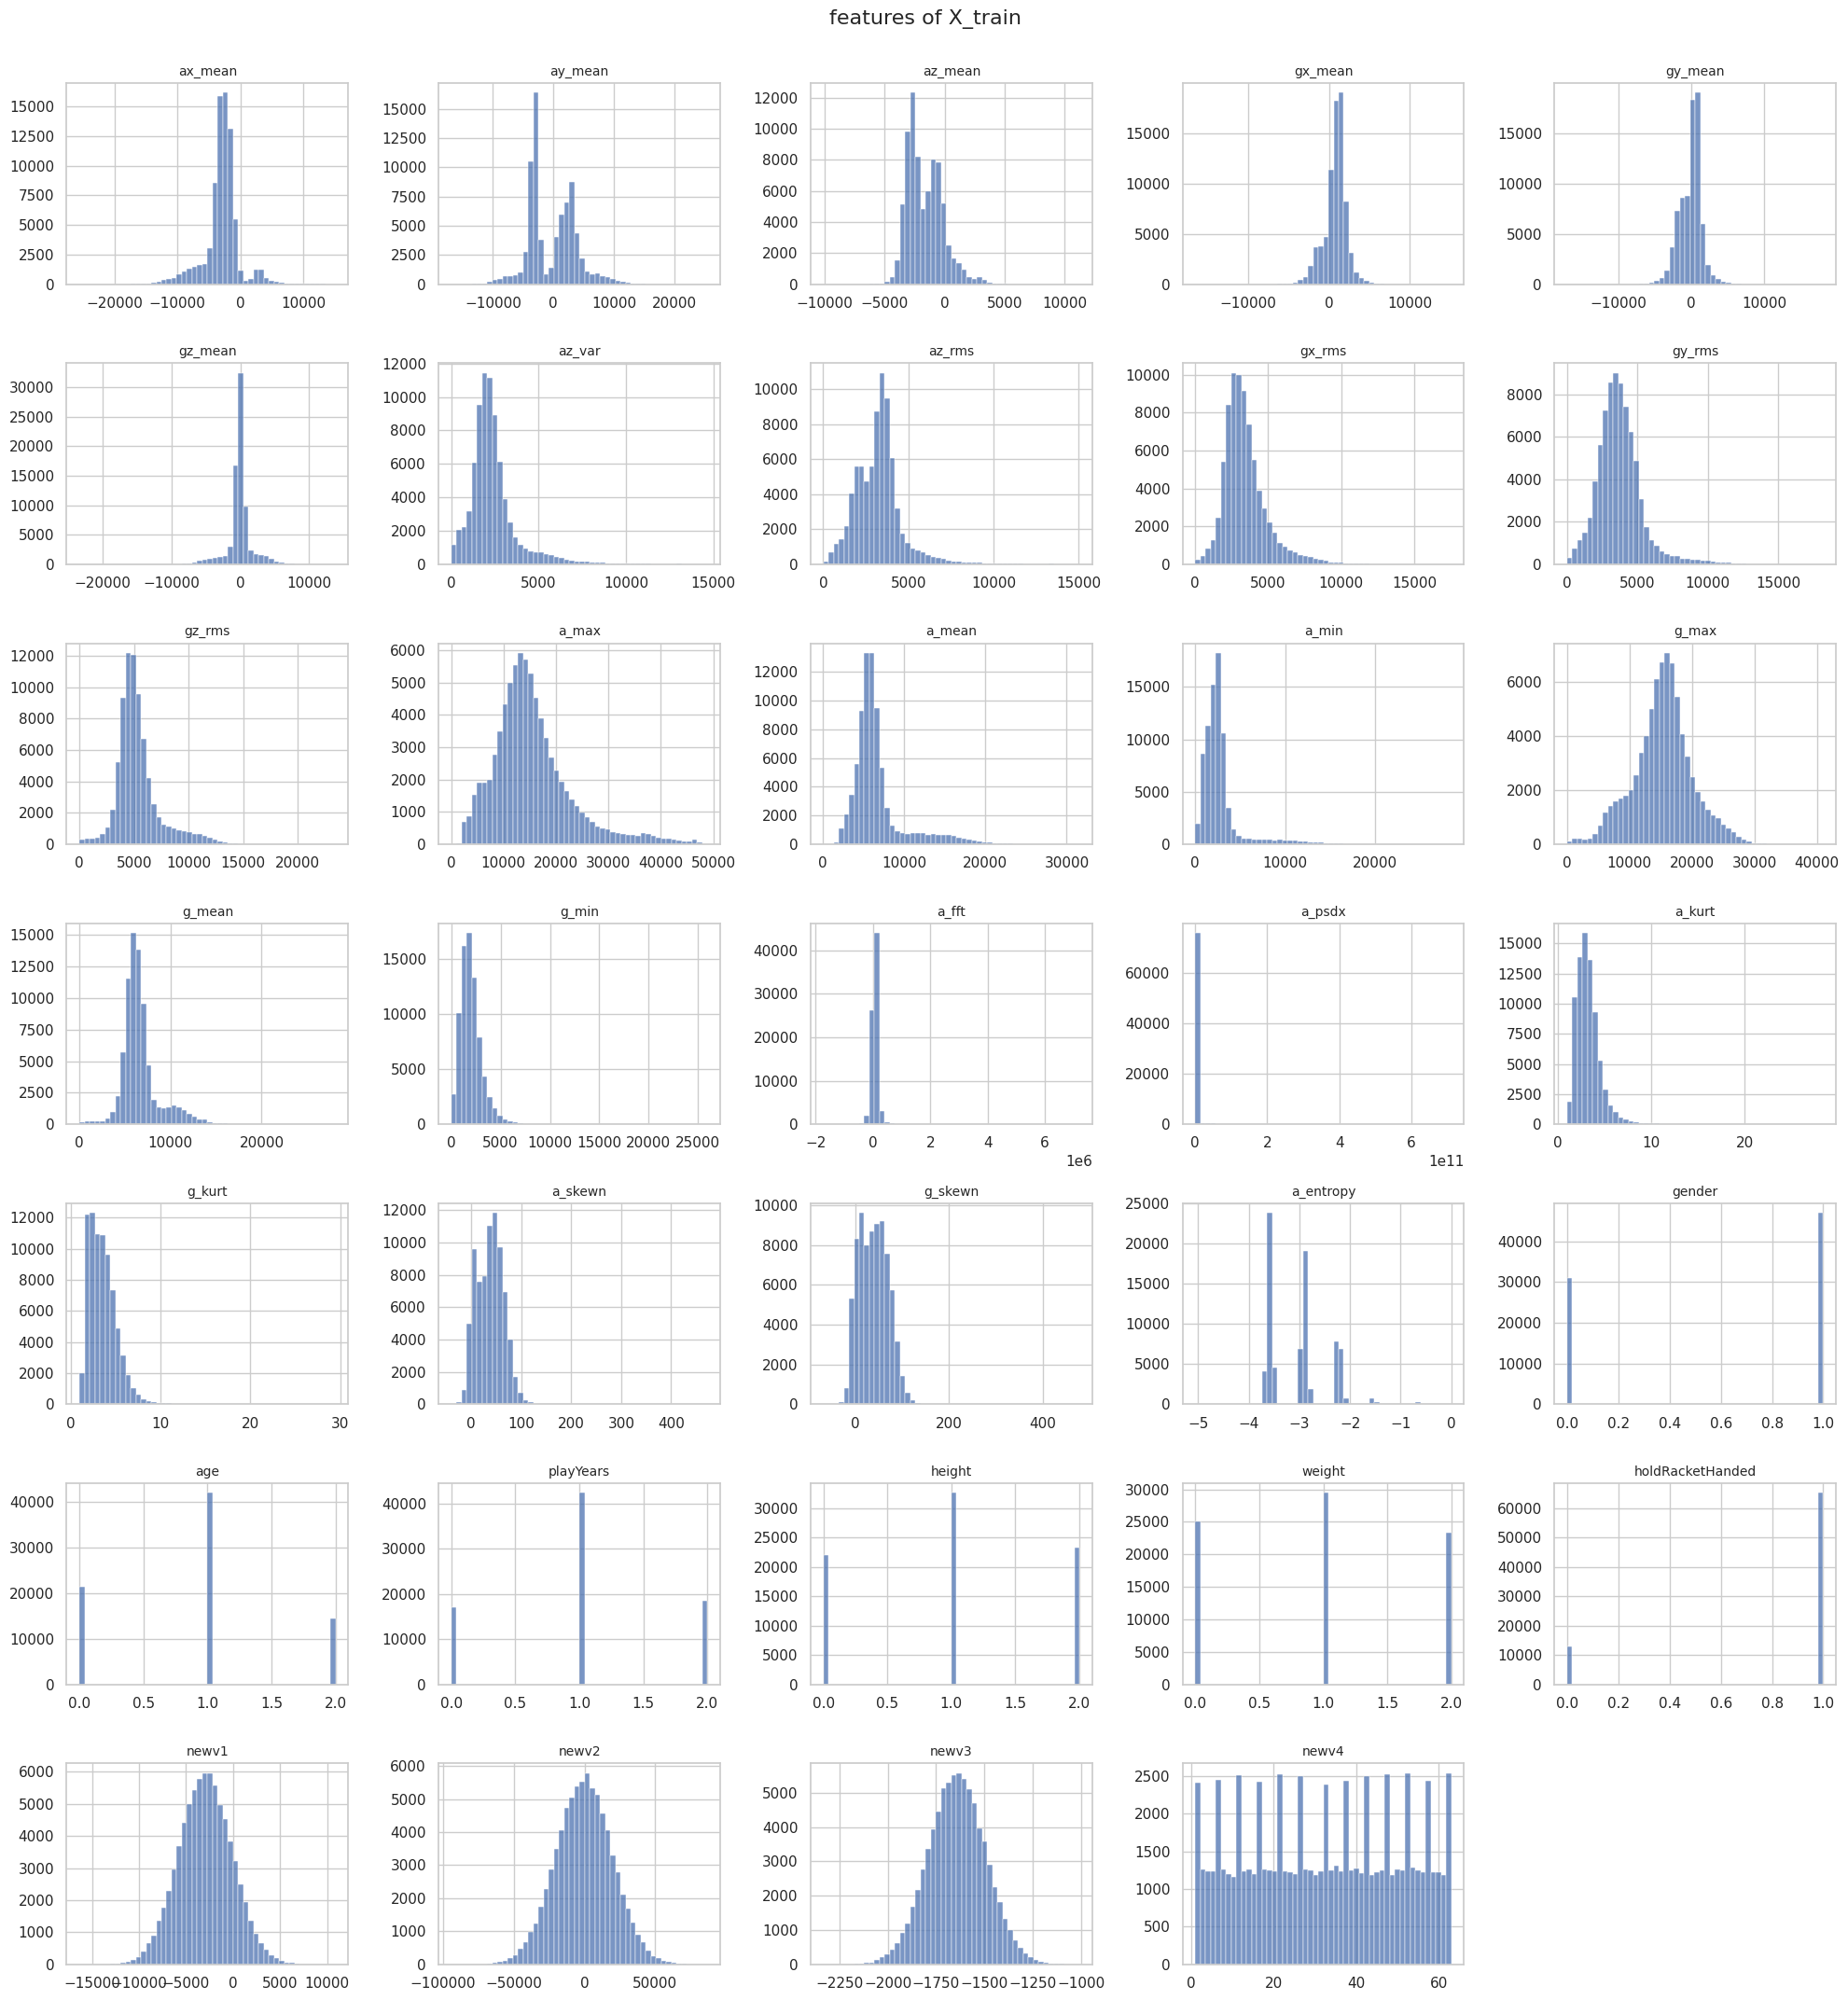

In [26]:
# 训练集上的数据分析
plot_histograms(X_train.columns.tolist(), 'features of X_train', X_train)

In [27]:
# 指定需要 log1p 变换的偏态特征

log_features = [
    'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min',
    'a_fft', 'a_psdx', 'a_kurt', 'g_kurt',
    'a_skewn', 'g_skewn',
    'az_rms', 'gx_rms', 'gy_rms', 'gz_rms'
]

# === 针对训练集：先用 clip 防止 log1p 出 NaN，再用中位数填补 NaN
for col in log_features:
    if col in X_train.columns:
        # 先 clip（防止 log1p 负数） → 再填补中位数 → 再 log1p
        X_train[col] = np.log1p(np.clip(X_train[col], a_min=0, a_max=None))
        median_val = X_train[col].median()  # 变换后可能还有 NaN，取中位数
        X_train[col] = X_train[col].fillna(median_val)

        # 测试集保持一致，用训练集中位数填补
        X_test[col] = np.log1p(np.clip(X_test[col], a_min=0, a_max=None))
        X_test[col] = X_test[col].fillna(median_val)

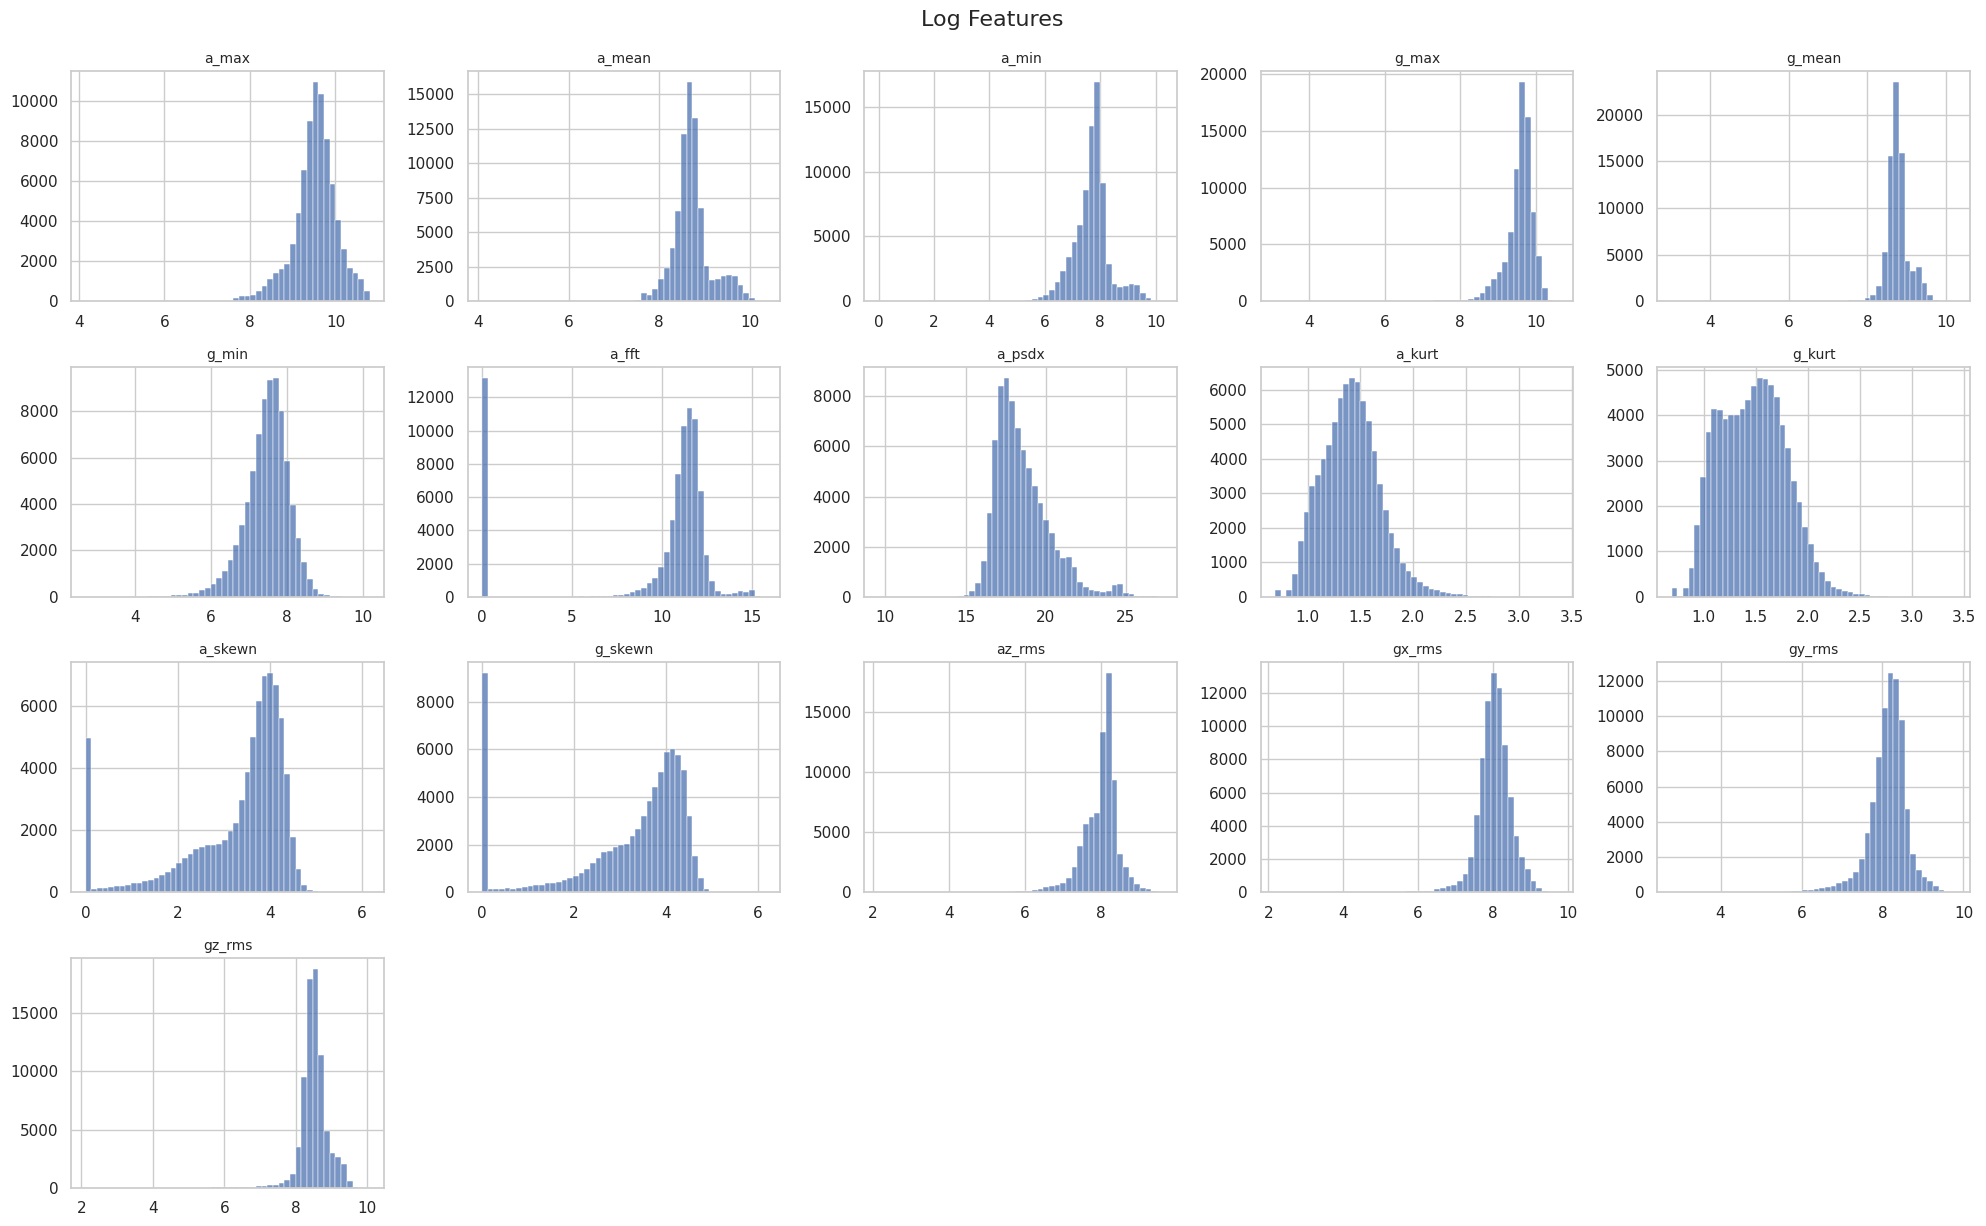

In [28]:
plot_histograms(log_features, 'Log Features', X_train)

In [29]:
df = X_train

# 1. 检查是否存在缺失值
has_nan = df.isnull().values.any()
print(f"是否存在缺失值: {has_nan}")

# 2. 各列缺失值数量
missing_per_column = df.isnull().sum()
print("\n每列的缺失值数量：")
print(missing_per_column[missing_per_column > 0])  # 只显示有缺失的列

# 3. 缺失值总数
total_missing = missing_per_column.sum()
print(f"\n总缺失值个数：{total_missing}")

# 4. 缺失值比例（可选）
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("\n缺失值比例（按列）：")
print(missing_ratio[missing_ratio > 0])

是否存在缺失值: False

每列的缺失值数量：
Series([], dtype: int64)

总缺失值个数：0

缺失值比例（按列）：
Series([], dtype: float64)



=== Mutual Information Scores ===
a_entropy                 : 0.3422
a_mean                    : 0.3199
ay_mean                   : 0.2800
g_mean                    : 0.2744
az_var                    : 0.2596
g_skewn                   : 0.2385
a_min                     : 0.2369
ax_mean                   : 0.2235
gz_rms                    : 0.2233
a_skewn                   : 0.2126
az_rms                    : 0.2038
g_max                     : 0.2035
a_max                     : 0.2026
gz_mean                   : 0.2009
gy_rms                    : 0.1493
g_kurt                    : 0.1467
a_fft                     : 0.1235
a_psdx                    : 0.1200
a_kurt                    : 0.1134
gx_rms                    : 0.1000
gy_mean                   : 0.0775
gx_mean                   : 0.0769
az_mean                   : 0.0745
g_min                     : 0.0723
age                       : 0.0319
playYears                 : 0.0192
holdRacketHanded          : 0.0118
height              

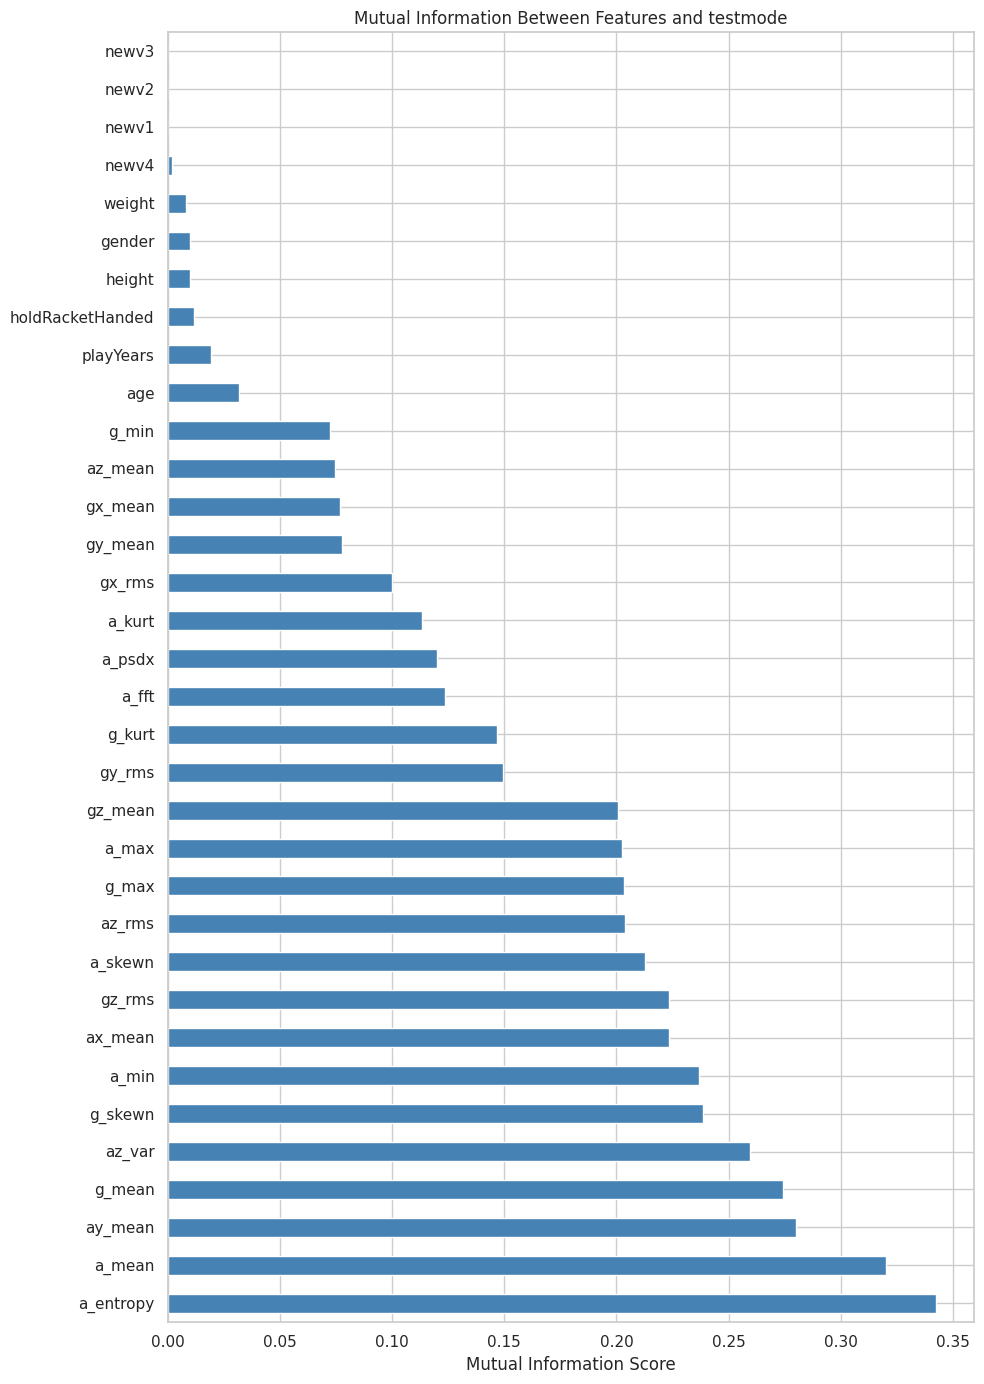

In [30]:
# === 计算互信息 ===
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# 输出互信息得分到控制台
print("\n=== Mutual Information Scores ===")
for feature, score in mi_series.items():
    print(f"{feature:<25} : {score:.4f}")

plt.figure(figsize=(10, 14))
mi_series.plot(kind='barh', color='steelblue')

plt.title("Mutual Information Between Features and testmode")
plt.xlabel("Mutual Information Score")
plt.tight_layout()
save_fig("mutual_information_scores")
plt.show()

##box

In [31]:
# 对所有数值型特征进行标准化
num_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_scaled = X_train.copy()
X_scaled[num_features] = scaler.fit_transform(X_train[num_features])

# 添加标签列（y 应为 testmode 标签）
X_scaled['testmode'] = y_train.values

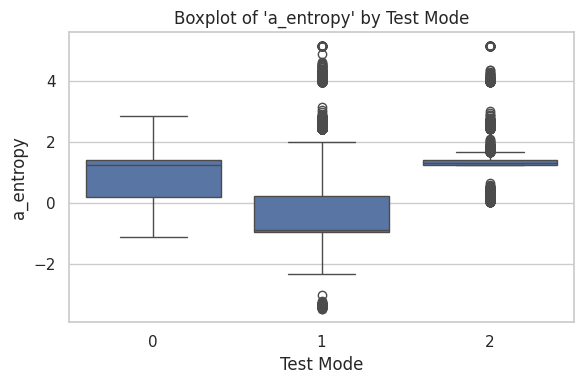

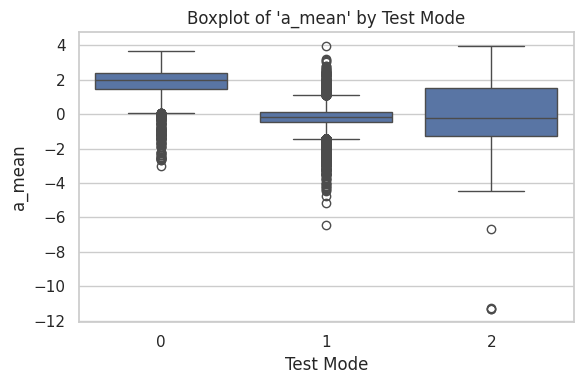

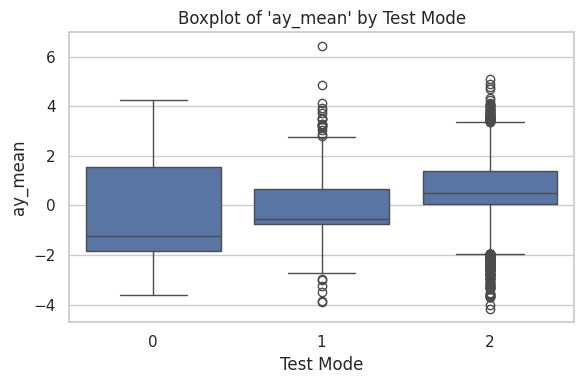

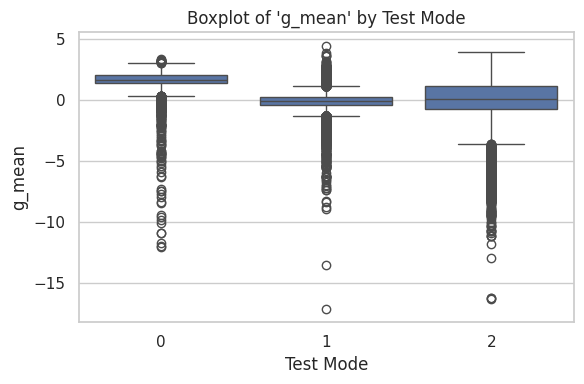

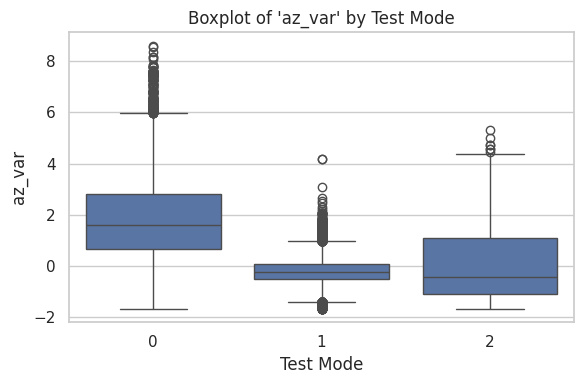

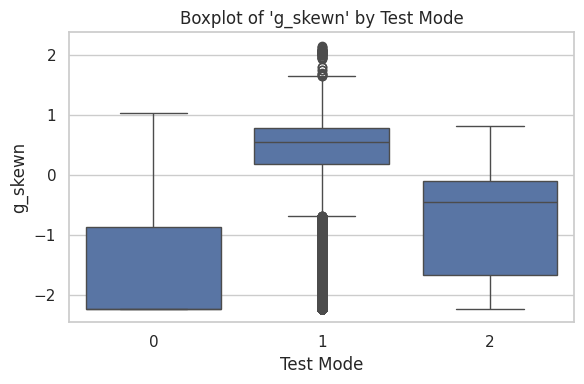

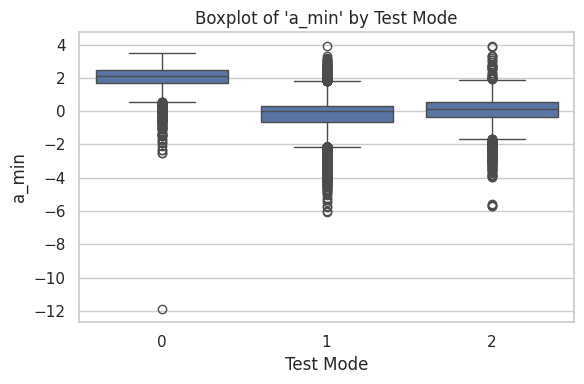

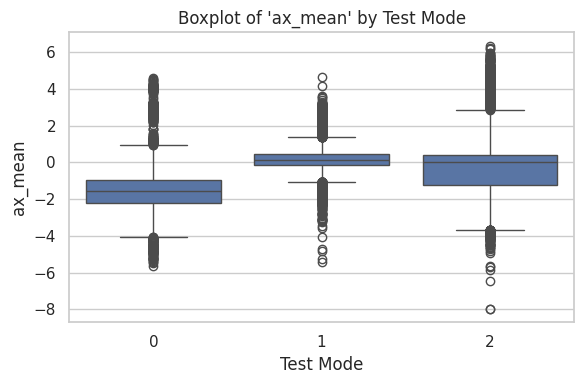

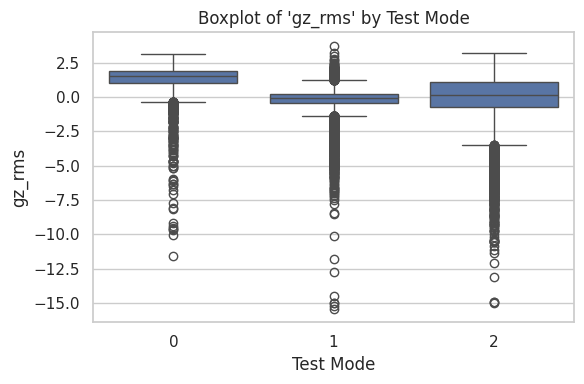

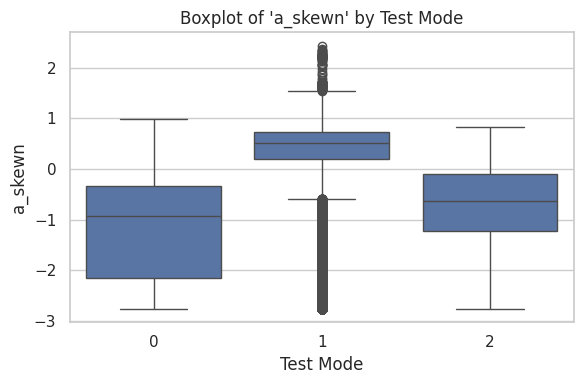

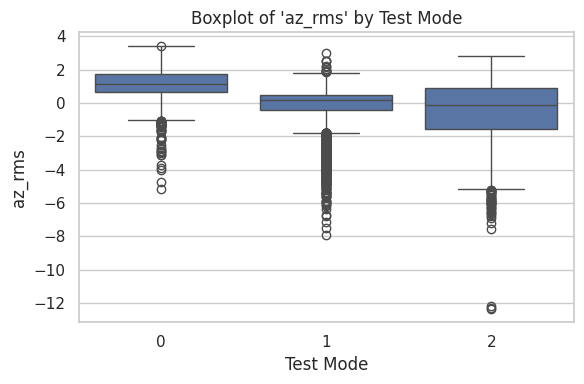

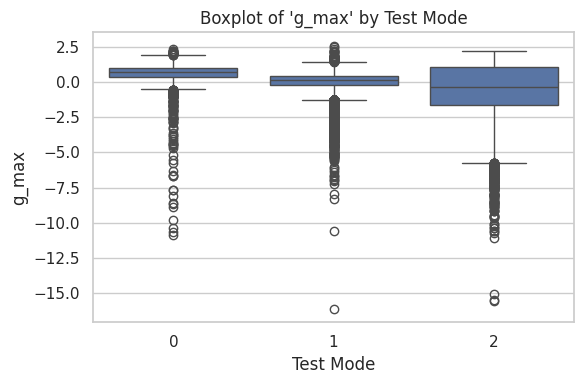

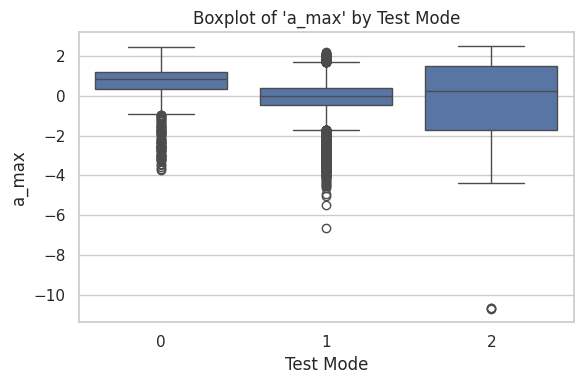

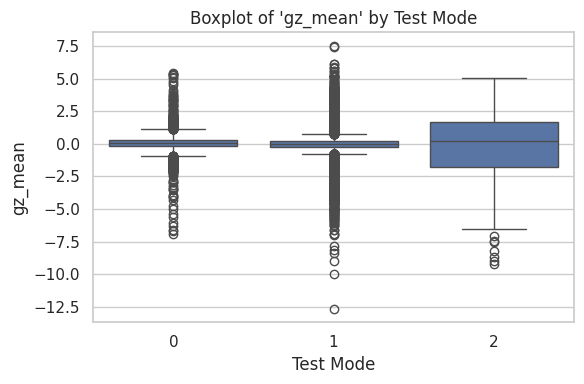

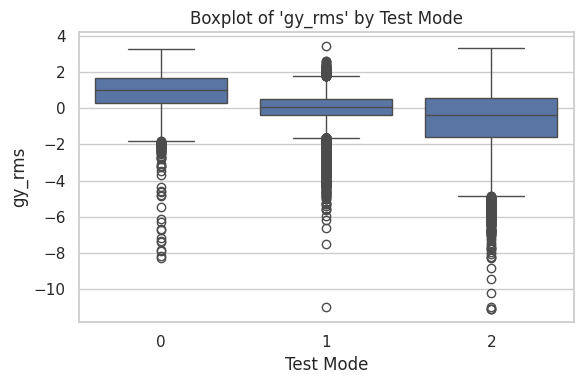

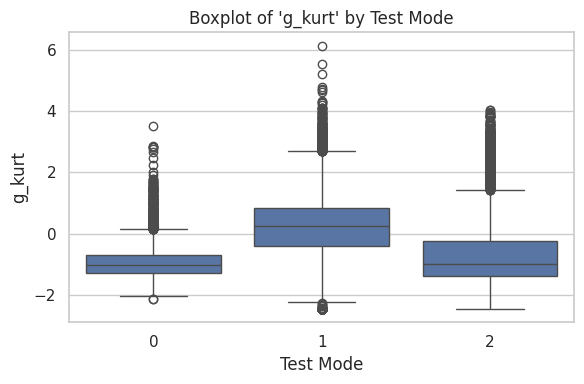

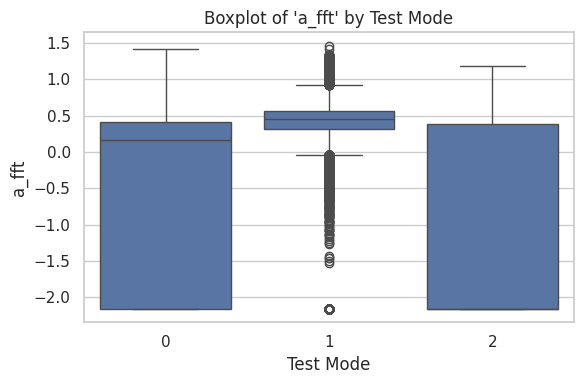

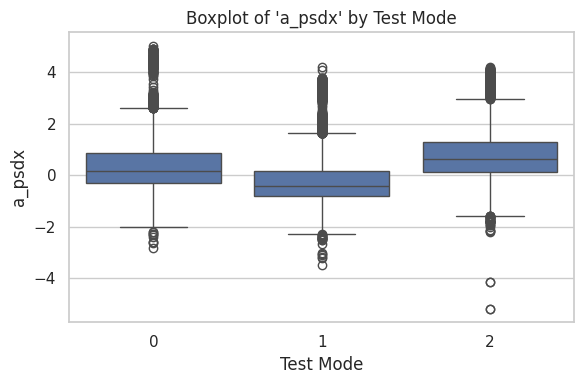

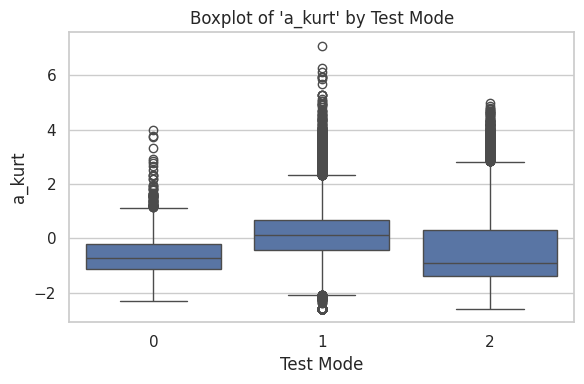

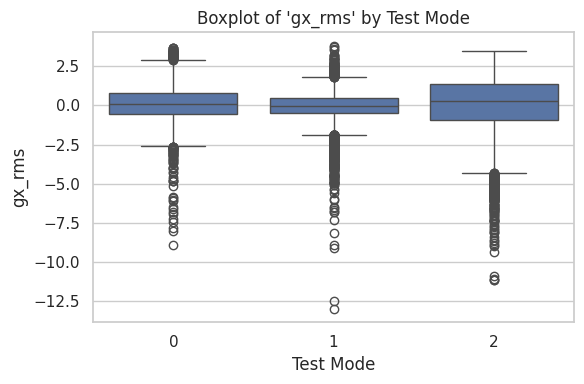

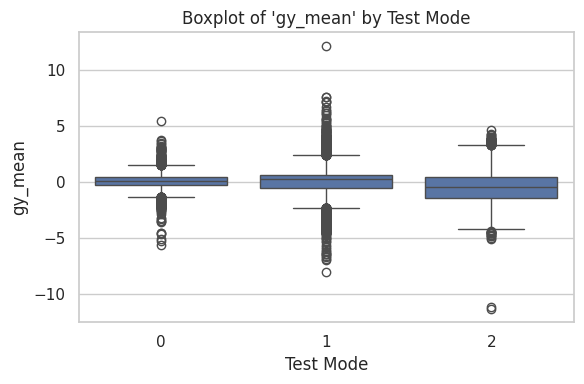

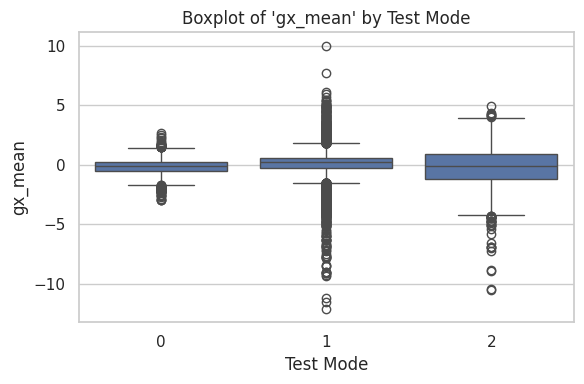

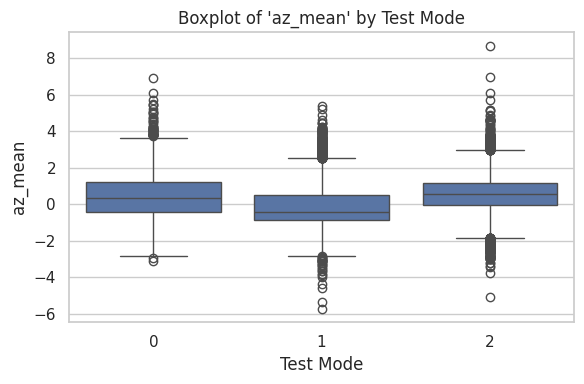

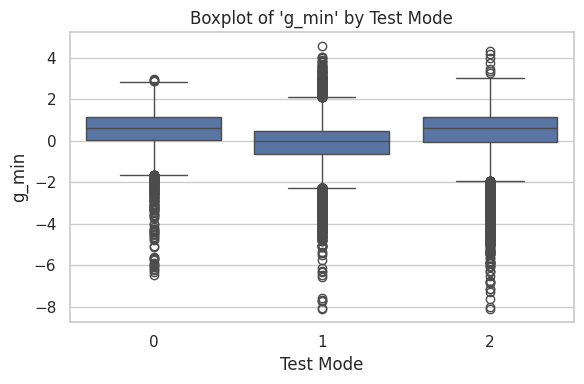

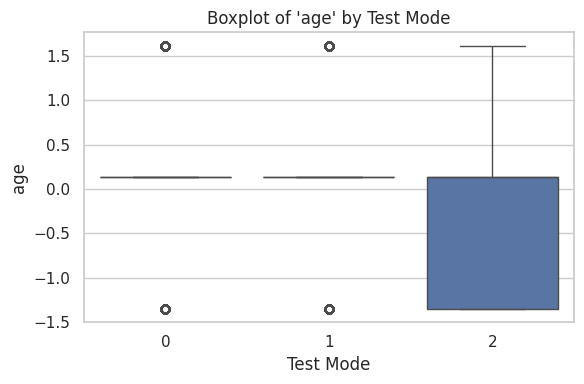

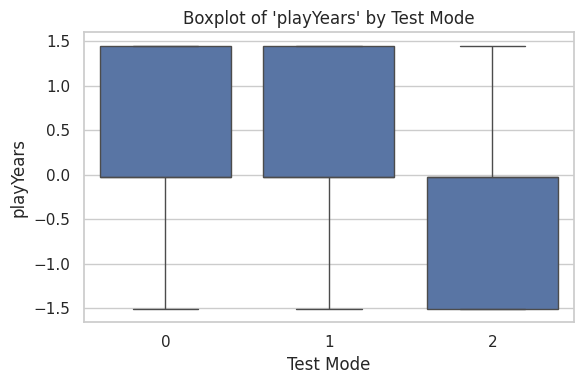

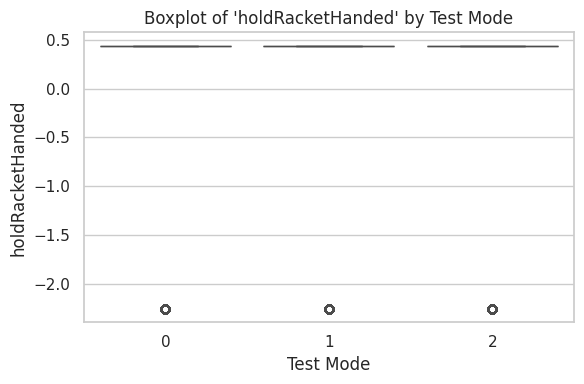

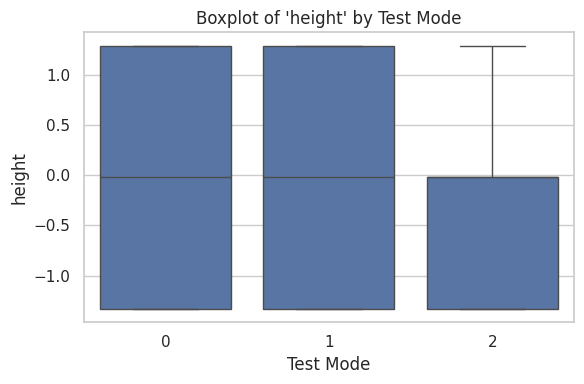

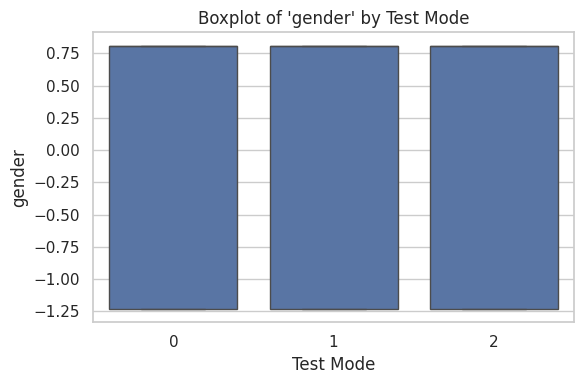

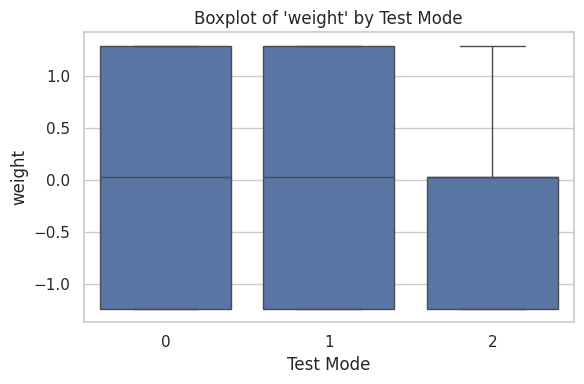

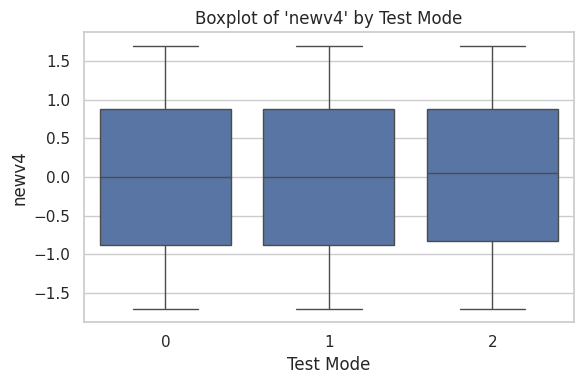

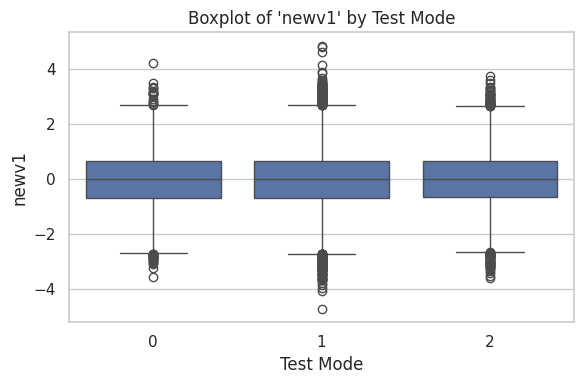

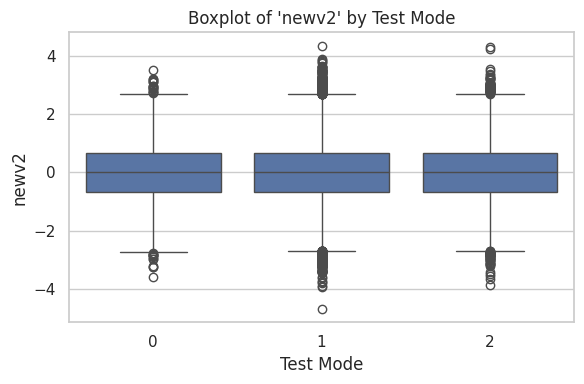

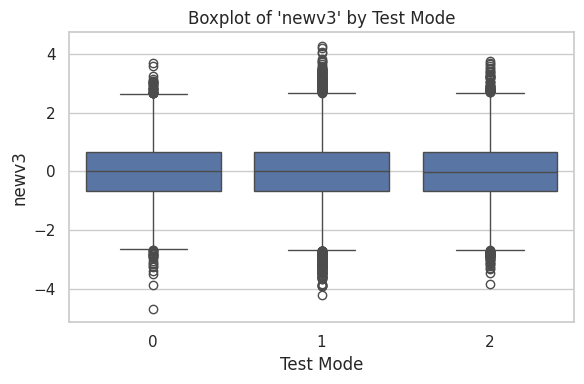

In [32]:
# 绘制 Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# 已经有 MI 排序后的结果
important_features = mi_series.index.tolist()

# 逐个绘制重要特征的 Boxplot（使用变换后的 X_scaled 数据）
for feature in important_features:
    if feature in X_scaled.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='testmode', y=feature, data=X_scaled)
        plt.title(f"Boxplot of '{feature}' by Test Mode", fontsize=12)
        plt.xlabel("Test Mode")
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature '{feature}' not found in X_scaled.")

In [33]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77880 entries, 9675 to 61727
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ax_mean           77880 non-null  float64
 1   ay_mean           77880 non-null  float64
 2   az_mean           77880 non-null  float64
 3   gx_mean           77880 non-null  float64
 4   gy_mean           77880 non-null  float64
 5   gz_mean           77880 non-null  float64
 6   az_var            77880 non-null  float64
 7   az_rms            77880 non-null  float64
 8   gx_rms            77880 non-null  float64
 9   gy_rms            77880 non-null  float64
 10  gz_rms            77880 non-null  float64
 11  a_max             77880 non-null  float64
 12  a_mean            77880 non-null  float64
 13  a_min             77880 non-null  float64
 14  g_max             77880 non-null  float64
 15  g_mean            77880 non-null  float64
 16  g_min             77880 non-null  float64


In [34]:
selected_features = [
    'a_entropy', 'a_mean', 'ay_mean', 'g_mean', 'az_var', 'g_skewn', 'a_min',
    'gz_rms', 'ax_mean', 'a_skewn', 'a_max', 'g_max', 'az_rms', 'gy_rms',
    'g_kurt', 'a_fft', 'a_psdx', 'gx_rms', 'a_kurt', 'gy_mean', 'age', 'playYears', 'height'
]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

y_train = y_train

In [35]:
y_train.unique()

array([0, 2, 1])

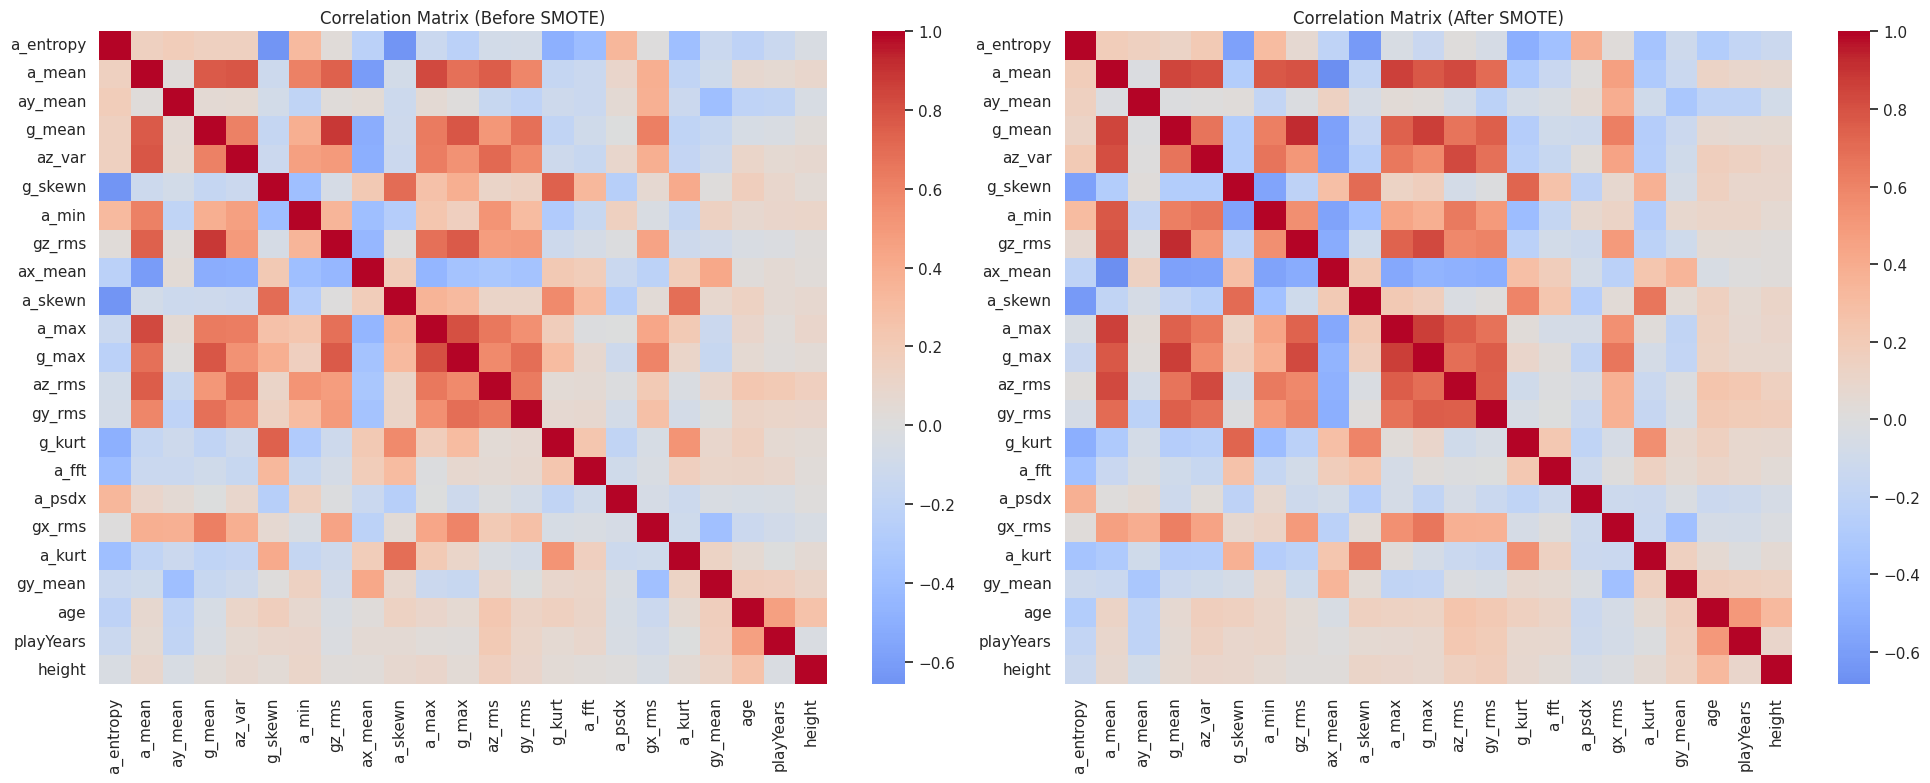

In [36]:
from imblearn.over_sampling import SMOTE

# 应用 SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 计算相关性矩阵
corr_before = X_train.corr()
corr_after = pd.DataFrame(X_train_resampled, columns=X_train.columns).corr()

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(corr_before, ax=axes[0], cmap='coolwarm', center=0)
axes[0].set_title("Correlation Matrix (Before SMOTE)")
sns.heatmap(corr_after, ax=axes[1], cmap='coolwarm', center=0)
axes[1].set_title("Correlation Matrix (After SMOTE)")
plt.tight_layout()
save_fig("Correlation Matrix (Before SMOTE and After SMOTE)")
plt.show()

In [37]:
from collections import Counter
# SMOTE 前
print("Before SMOTE:", Counter(y_train))
# SMOTE 后
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({1: 59080, 2: 12800, 0: 6000})
After SMOTE: Counter({0: 59080, 2: 59080, 1: 59080})


In [38]:
import sys
print("Python version:", sys.version)

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import xgboost
import imblearn

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scikit-learn:", sklearn.__version__)
print("XGBoost:", xgboost.__version__)
print("Imbalanced-learn:", imblearn.__version__)

Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
NumPy: 2.0.2
Pandas: 2.2.2
Matplotlib: 3.10.0
Seaborn: 0.13.2
Scikit-learn: 1.6.1
XGBoost: 2.1.4
Imbalanced-learn: 0.13.0


In [39]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize

# =========================== #
# 📚 通用模型训练与评估函数
# =========================== #
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name='Model'):
    results = {}

    # 训练
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    train_time = end_train - start_train

    # 推理
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()

    pred_time = end_pred - start_pred

    # 计算指标
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # 保存结果
    results['model_name'] = model_name
    results['train_time_sec'] = train_time
    results['inference_time_sec'] = pred_time
    results['accuracy'] = acc
    results['precision'] = prec
    results['recall'] = rec
    results['f1_score'] = f1
    results['y_pred'] = y_pred
    results['model'] = model

    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    print(f"Train time: {train_time:.2f}s | Inference time: {pred_time:.4f}s")

    # 🖼️ 绘制图表
    plot_confusion_matrix(y_test, y_pred, model_name)
    save_fig(f"{model_name}_confusion_matrix")
    plot_precision_recall(y_test, y_pred, model_name)
    save_fig(f"{model_name}_precision_recall")
    plot_roc_curve(y_test, model.predict_proba(X_test), model_name)
    save_fig(f"{model_name}_roc_curve")

    return results

# =========================== #
# 🎨 混淆矩阵绘制
# =========================== #
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    save_fig(f"{model_name}_confusion_matrix")
    plt.show()

# =========================== #
# 🎨 Precision-Recall 曲线
# =========================== #
def plot_precision_recall(y_true, y_pred, model_name):
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

    plt.figure(figsize=(7, 5))
    for i in range(y_true_bin.shape[1]):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
        ap = average_precision_score(y_true_bin[:, i], y_pred_bin[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AP={ap:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    save_fig(f"{model_name}_precision_recall")
    plt.show()

# =========================== #
# 🎨 ROC 曲线
# =========================== #
def plot_roc_curve(y_true, y_score, model_name):
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

    plt.figure(figsize=(7, 5))
    for i in range(y_true_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        auc_score = roc_auc_score(y_true_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC={auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    save_fig(f"{model_name}_roc_curve")
    plt.show()

## 1.Logistic Regression

### 1.1 没有5Fold

In [95]:
def train_logistic_regression(X_train, y_train, X_test, y_test, C=1.0):
    model = LogisticRegression(
        C=C,
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
    return train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name='Logistic Regression')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression ===
Accuracy: 0.9383 | Precision: 0.8907 | Recall: 0.9376 | F1-Score: 0.9121
Train time: 6.19s | Inference time: 0.0073s


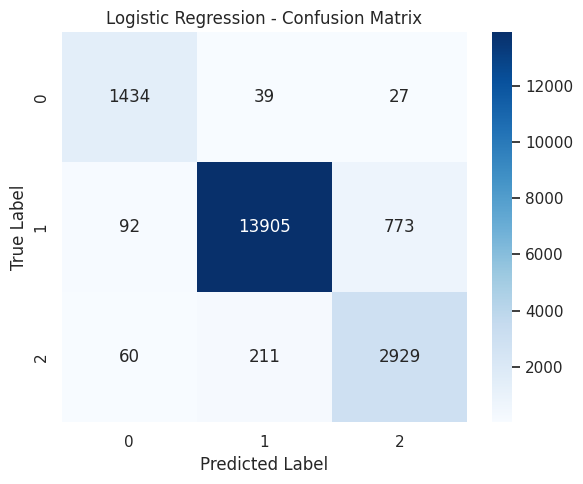

<Figure size 640x480 with 0 Axes>

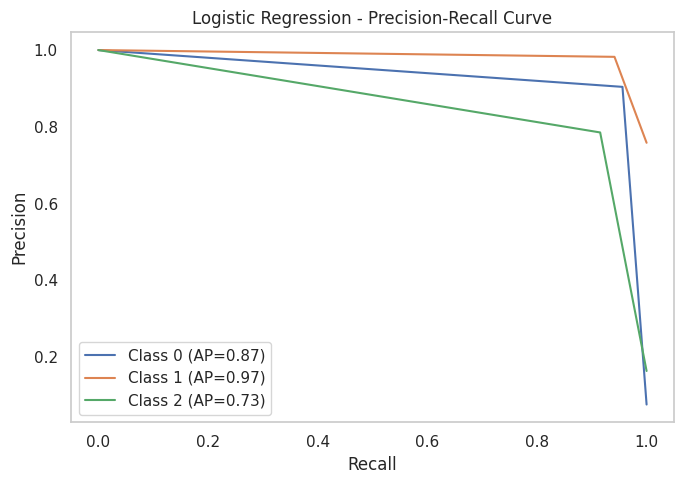

<Figure size 640x480 with 0 Axes>

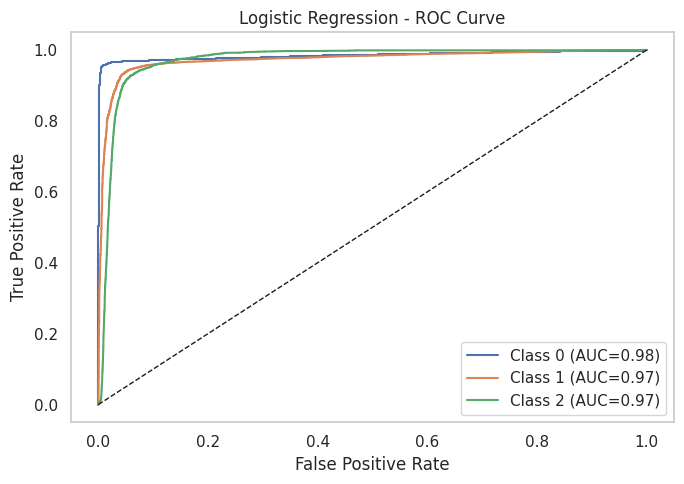

<Figure size 640x480 with 0 Axes>

In [96]:
# 测试Logistic Regression，C=1
result_logistic = train_logistic_regression(X_train_resampled, y_train_resampled, X_test, y_test, C=1)

### 1.2 有5Fold

In [213]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def train_logistic_regression(X_train, y_train, X_test, y_test, C=1.0, cv_folds=5, use_pca=False):
    if use_pca:
      pca = PCA(n_components=0.95,random_state=42)
      X_train = pca.fit_transform(X_train)
      X_test = pca.transform(X_test)
      print(f"PCA enabled: Retained {X_train.shape[1]} components explaining 95% variance.")


    model = LogisticRegression(
       C=C,
       multi_class='multinomial',
       solver='lbfgs',
       max_iter=1000,
       random_state=42
    )

    # ====== 加上 5-Fold Cross Validation评估 ======
    print(f"\n=== {cv_folds}-Fold Cross-Validation for Logistic Regression (C={C}) ===")
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy', n_jobs=-1)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # ====== 用完整训练集训练，测试集评估 ======
    return train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name='Logistic Regression')


=== 5-Fold Cross-Validation for Logistic Regression (C=1) ===
Cross-Validation Accuracy: 0.8674 ± 0.0081


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
Accuracy: 0.8697 | Precision: 0.7568 | Recall: 0.8425 | F1-Score: 0.7927
Train time: 37.72s | Inference time: 0.0056s


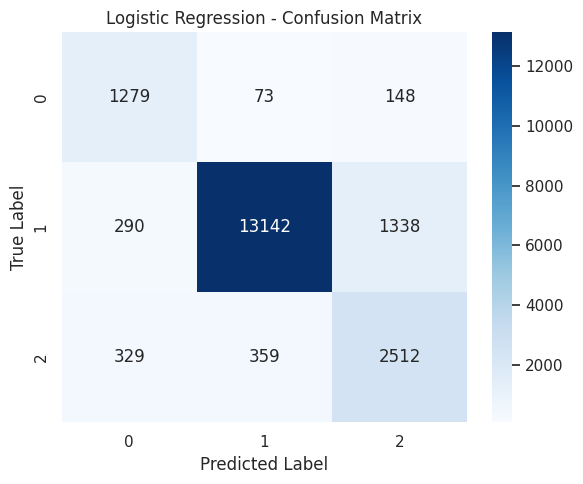

<Figure size 640x480 with 0 Axes>

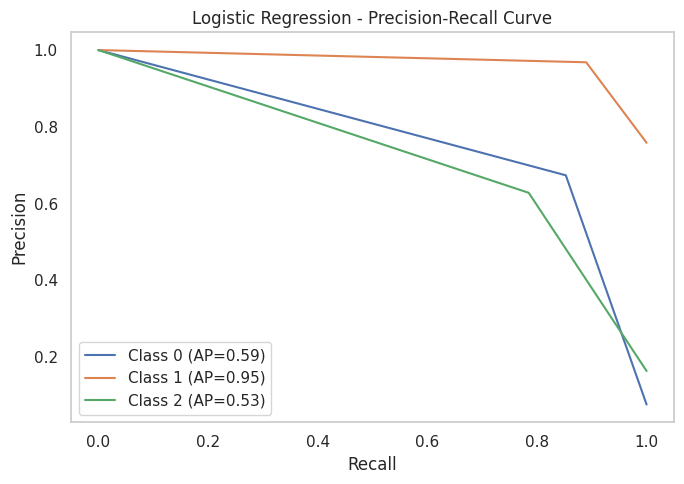

<Figure size 640x480 with 0 Axes>

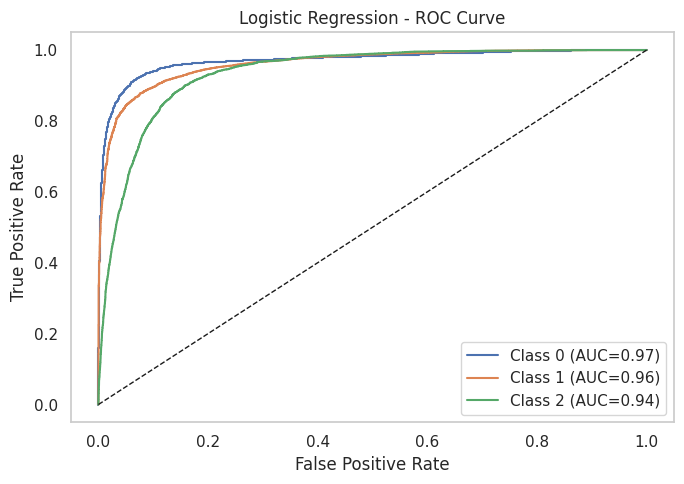

<Figure size 640x480 with 0 Axes>

In [214]:
result_logistic_raw = train_logistic_regression(X_train_resampled, y_train_resampled, X_test, y_test, C=1)

PCA enabled: Retained 3 components explaining 95% variance.

=== 5-Fold Cross-Validation for Logistic Regression (C=1) ===
Cross-Validation Accuracy: 0.6035 ± 0.0016


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression ===
Accuracy: 0.5886 | Precision: 0.5433 | Recall: 0.5970 | F1-Score: 0.5420
Train time: 1.93s | Inference time: 0.0013s


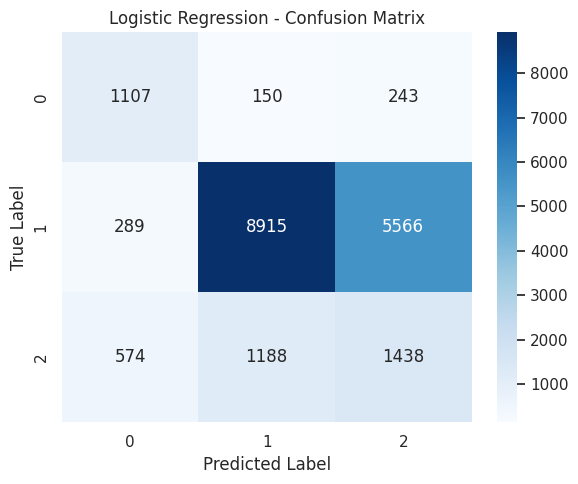

<Figure size 640x480 with 0 Axes>

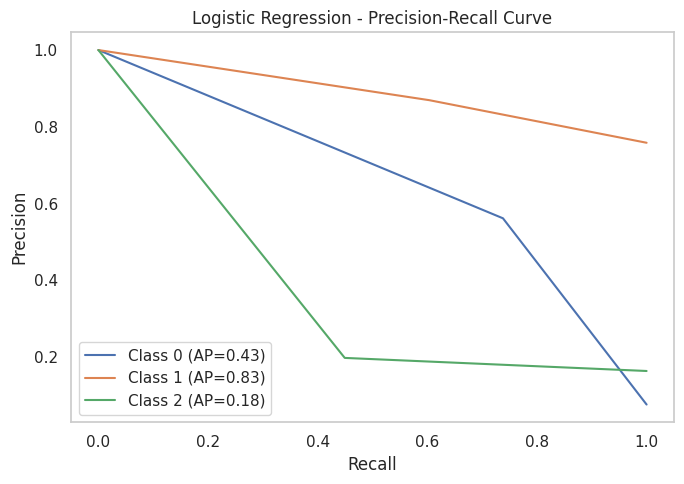

<Figure size 640x480 with 0 Axes>

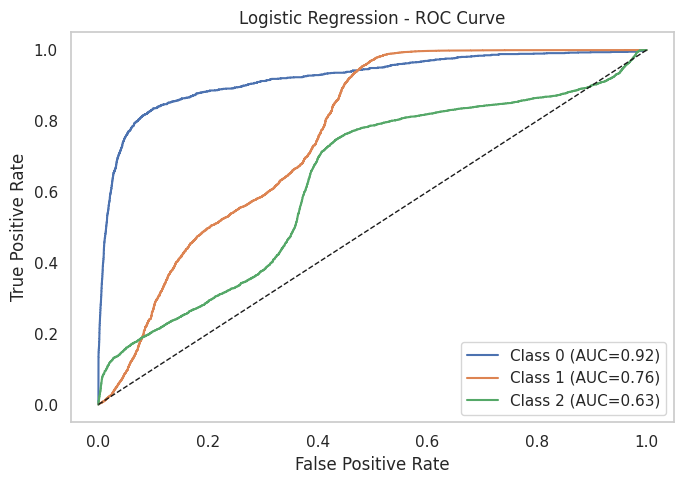

<Figure size 640x480 with 0 Axes>

In [215]:
result_logistic_pca = train_logistic_regression(X_train_resampled, y_train_resampled, X_test, y_test, C=1, use_pca=True)

## 2.Random Forest

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def random_forest_gridsearch_cv(X_train, y_train, max_depth_list=[2, 4, 8, 16, 32, 64, 128], cv_folds=5, use_pca=False):
    print("=== Random Forest Cross-Validation Grid Search (n_estimators=100) ===")
    results = []
    if use_pca:
      pca = PCA(n_components=0.95,random_state=42)
      X_train = pca.fit_transform(X_train)
      print(f"PCA enabled: Retained {X_train.shape[1]} components explaining 95% variance.")


    for d in max_depth_list:
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=d,
            random_state=42,
            n_jobs=-1
        )

        scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        mean_acc = scores.mean()
        mean_loss = 1 - mean_acc

        print(f"max_depth={d}: CV Mean Accuracy={mean_acc:.4f}")

        results.append({
            'max_depth': d,
            'CV_Mean_Accuracy': mean_acc,
            'CV_Mean_Loss': mean_loss
        })

    results_df = pd.DataFrame(results)

    # --- 画图：Accuracy 和 Loss ---
    plt.figure(figsize=(8,6))
    plt.plot(results_df['max_depth'], results_df['CV_Mean_Accuracy'], marker='o', label='Accuracy', color='blue')
    plt.plot(results_df['max_depth'], results_df['CV_Mean_Loss'], marker='o', label='Loss', color='orange')
    plt.xscale('log', base=2)  # 横轴log2
    plt.xlabel('Random Forest Depth')
    plt.ylabel('Accuracy/Loss')
    plt.title('Random Forest model test loss and accuracy vs depth')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- 找最佳 ---
    best_row = results_df.loc[results_df['CV_Mean_Accuracy'].idxmax()]
    best_d = int(best_row['max_depth'])
    best_acc = best_row['CV_Mean_Accuracy']

    print("\n=== Best Parameter ===")
    print(f"✅ Best max_depth = {best_d} with Cross-Validated Accuracy = {best_acc:.4f}")

    return results_df, (best_d, best_acc)

=== Random Forest Cross-Validation Grid Search (n_estimators=100) ===
max_depth=2: CV Mean Accuracy=0.9688
max_depth=4: CV Mean Accuracy=0.9764
max_depth=8: CV Mean Accuracy=0.9937
max_depth=16: CV Mean Accuracy=0.9976
max_depth=32: CV Mean Accuracy=0.9974
max_depth=64: CV Mean Accuracy=0.9974
max_depth=128: CV Mean Accuracy=0.9974


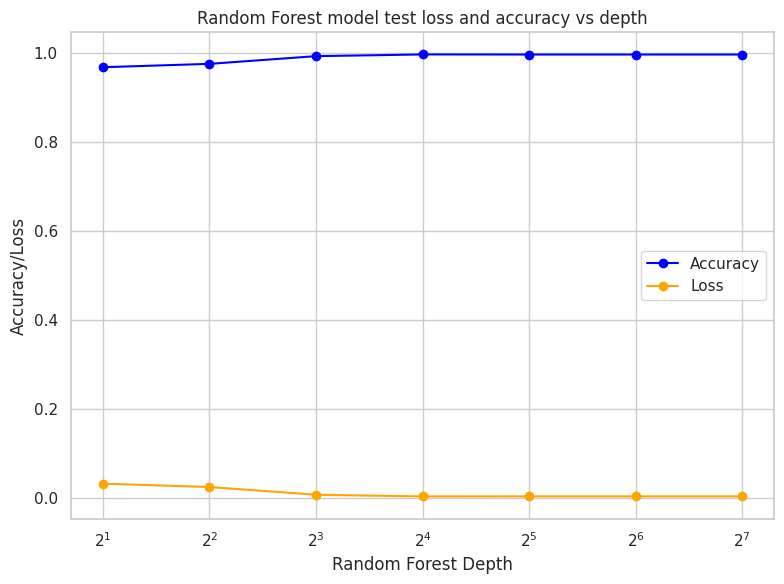


=== Best Parameter ===
✅ Best max_depth = 16 with Cross-Validated Accuracy = 0.9976


In [38]:
results_rf_cv, best_params_rf_cv = random_forest_gridsearch_cv(X_train_resampled, y_train_resampled)

=== Random Forest Cross-Validation Grid Search (n_estimators=100) ===
PCA enabled: Retained 3 components explaining 95% variance.
max_depth=2: CV Mean Accuracy=0.9247
max_depth=4: CV Mean Accuracy=0.9511
max_depth=8: CV Mean Accuracy=0.9644
max_depth=16: CV Mean Accuracy=0.9714
max_depth=32: CV Mean Accuracy=0.9727
max_depth=64: CV Mean Accuracy=0.9727
max_depth=128: CV Mean Accuracy=0.9727


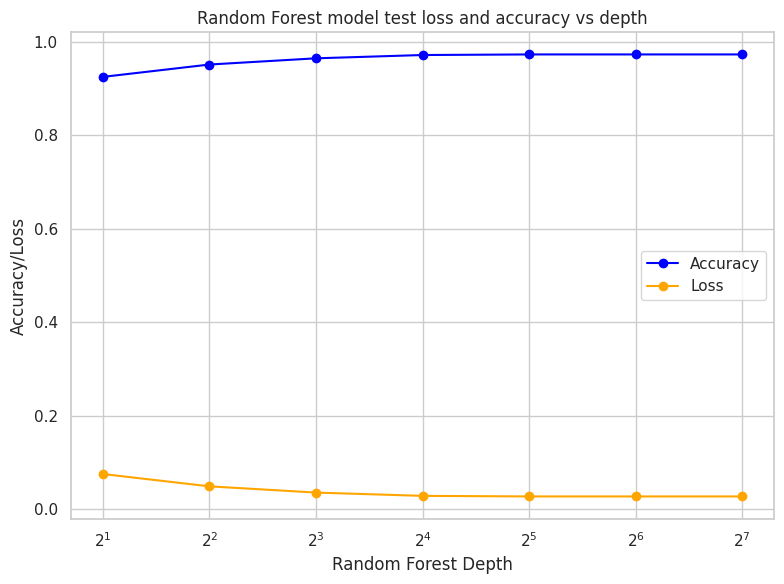


=== Best Parameter ===
✅ Best max_depth = 32 with Cross-Validated Accuracy = 0.9727


In [45]:
results_rf_cv, best_params_rf_cv = random_forest_gridsearch_cv(X_train_resampled, y_train_resampled, use_pca=True)

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def train_random_forest_and_plot(X_train, y_train, X_test, y_test, max_depth=16, n_estimators=100):
    print(f"=== Training Random Forest with max_depth={max_depth} ===")

    # 1. 训练模型
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 2. 输出基础指标
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-score={f1:.4f}")

    # 3. 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(6,6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Random Forest Confusion Matrix')
    plt.show()

    # 4. Precision-Recall曲线
    y_test_bin = label_binarize(y_test, classes=[0,1,2])
    y_score = model.predict_proba(X_test)

    plt.figure(figsize=(8,6))
    for i in range(3):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        ap = auc(recall, precision)
        plt.plot(recall, precision, label=f'Class {i} (AP={ap:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Random Forest Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 5. ROC曲线
    plt.figure(figsize=(8,6))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC={roc_auc:.2f})')

    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return model


=== Training Random Forest with max_depth=16 ===
Accuracy=0.9762, Precision=0.9558, Recall=0.9757, F1-score=0.9654


<Figure size 600x600 with 0 Axes>

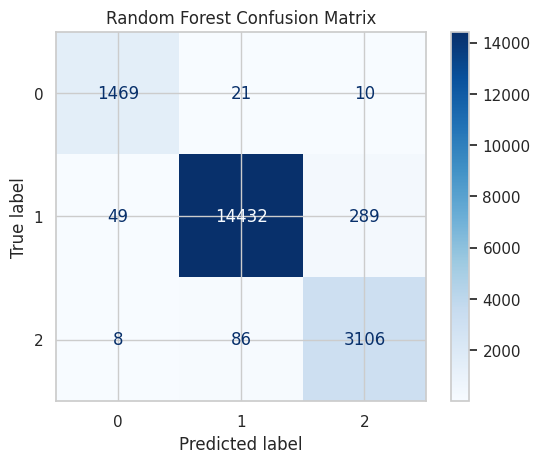

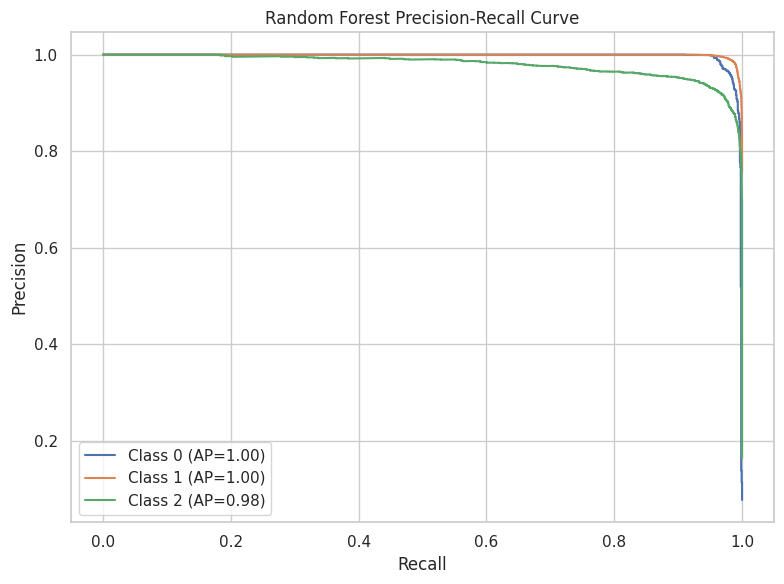

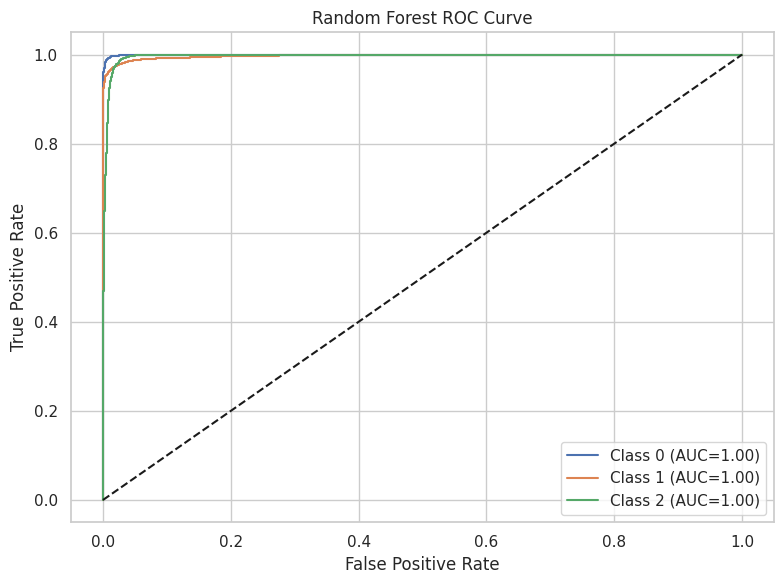

In [95]:
rf_model = train_random_forest_and_plot(X_train_resampled, y_train_resampled, X_test, y_test, max_depth=16, n_estimators=100)

In [96]:
# rf_model = train_random_forest_and_plot(X_train_resampled, y_train_resampled, X_test, y_test, max_depth=64, n_estimators=100, use_pca=True)

## 3.KNN


### 3.1 没有5Fold

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

def knn_gridsearch_plot_loss(X_train, y_train, X_test, y_test, k_list=[2, 4, 8, 16, 32, 64, 128], use_pca=False):
    results = []
    if use_pca:
      pca = PCA(n_components=0.95,random_state=42)
      X_train = pca.fit_transform(X_train)
      X_test = pca.fit_transform(X_test)
      print(f"PCA enabled: Retained {X_train.shape[1]} components explaining 95% variance.")

    print("=== KNN Train/Test Grid Search ===")
    for k in k_list:
        model = KNeighborsClassifier(
            n_neighbors=k,
            n_jobs=-1
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        loss = 1 - acc  # Loss = 1 - Accuracy

        print(f"k={k}: Test Accuracy={acc:.4f}")

        results.append({
            'k': k,
            'Test_Accuracy': acc,
            'Test_Loss': loss
        })

    results_df = pd.DataFrame(results)

    # --- 画图 ---
    plt.figure(figsize=(8,6))
    plt.plot(results_df['k'], results_df['Test_Accuracy'], marker='o', label='Accuracy', color='blue')
    plt.plot(results_df['k'], results_df['Test_Loss'], marker='o', label='Loss', color='orange')
    plt.xscale('log', base=2)
    plt.xlabel('k-neighbors (log2 scale)')
    plt.ylabel('Accuracy/Loss')
    plt.title('KNN Test Accuracy and Loss vs k')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results_df


In [ ]:
results_knn_loss_plot = knn_gridsearch_plot_loss(X_train_resampled, y_train_resampled, X_test, y_test)

=== KNN Train/Test Grid Search ===


### 3.2 有5Fold


=== KNN Cross-Validation Grid Search ===
k=1: CV Mean Accuracy=0.9631
k=2: CV Mean Accuracy=0.9577
k=4: CV Mean Accuracy=0.9522
k=8: CV Mean Accuracy=0.9422
k=16: CV Mean Accuracy=0.9311
k=32: CV Mean Accuracy=0.9201
k=64: CV Mean Accuracy=0.9095
k=128: CV Mean Accuracy=0.8985


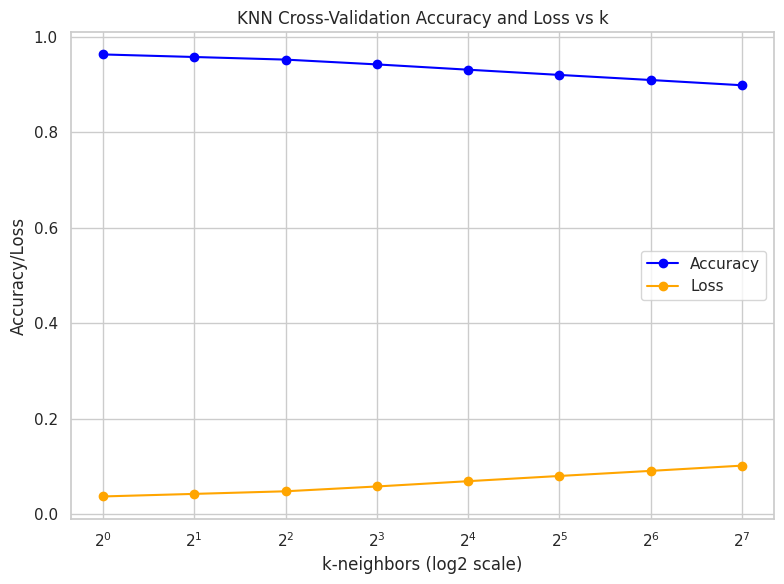

KeyboardInterrupt: 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold
from sklearn.decomposition import PCA

def knn_gridsearch_cv_plot_loss(X_train, y_train, k_list=[1, 2, 4, 8, 16, 32, 64, 128], cv_folds=5, use_pca=False):
    print("=== KNN Cross-Validation Grid Search ===")
    results = []
    if use_pca:
        pca = PCA(n_components=0.95, random_state=42)
        X_train = pca.fit_transform(X_train)
        print(f"PCA enabled: Retained {X_train.shape[1]} components explaining 95% variance.")

    for k in k_list:
        model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

        scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        mean_acc = scores.mean()
        mean_loss = 1 - mean_acc  # Loss = 1 - Accuracy

        print(f"k={k}: CV Mean Accuracy={mean_acc:.4f}")

        results.append({
            'k': k,
            'CV_Mean_Accuracy': mean_acc,
            'CV_Mean_Loss': mean_loss
        })

    results_df = pd.DataFrame(results)

    # --- Accuracy and Loss Plot ---
    plt.figure(figsize=(8,6))
    plt.plot(results_df['k'], results_df['CV_Mean_Accuracy'], marker='o', label='Accuracy', color='blue')
    plt.plot(results_df['k'], results_df['CV_Mean_Loss'], marker='o', label='Loss', color='orange')
    plt.xscale('log', base=2)
    plt.xlabel('k-neighbors (log2 scale)')
    plt.ylabel('Accuracy/Loss')
    plt.title('KNN Cross-Validation Accuracy and Loss vs k')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Learning Curve Plot for Best k ---
    best_k = results_df.loc[results_df['CV_Mean_Accuracy'].idxmax()]['k']
    best_model = KNeighborsClassifier(n_neighbors=int(best_k), n_jobs=-1)

    train_sizes, train_scores, val_scores = learning_curve(
        best_model, X_train, y_train,
        cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42),
        train_sizes=np.linspace(0.1, 1.0, 8),
        scoring='accuracy',
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation Score')
    plt.title(f'Learning Curve for KNN (k={int(best_k)})')
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    return results_df
results_df = knn_gridsearch_cv_plot_loss(X_train_resampled, y_train_resampled)


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
def knn_gridsearch_cv_plot_loss(X_train, y_train, k_list=[1, 2, 4, 8, 16, 32, 64, 128], cv_folds=5, use_pca=False):
    print("=== KNN Cross-Validation Grid Search ===")
    results = []
    if use_pca:
      pca = PCA(n_components=0.95,random_state=42)
      X_train = pca.fit_transform(X_train)
      print(f"PCA enabled: Retained {X_train.shape[1]} components explaining 95% variance.")


    for k in k_list:
        model = KNeighborsClassifier(
            n_neighbors=k,
            n_jobs=-1
        )

        scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        mean_acc = scores.mean()
        mean_loss = 1 - mean_acc  # Loss = 1 - Accuracy

        print(f"k={k}: CV Mean Accuracy={mean_acc:.4f}")

        results.append({
            'k': k,
            'CV_Mean_Accuracy': mean_acc,
            'CV_Mean_Loss': mean_loss
        })

    results_df = pd.DataFrame(results)

    # --- 画图 ---
    plt.figure(figsize=(8,6))
    plt.plot(results_df['k'], results_df['CV_Mean_Accuracy'], marker='o', label='Accuracy', color='blue')
    plt.plot(results_df['k'], results_df['CV_Mean_Loss'], marker='o', label='Loss', color='orange')
    plt.xscale('log', base=2)
    plt.xlabel('k-neighbors (log2 scale)')

    plt.ylabel('Accuracy/Loss')
    plt.title('KNN Cross-Validation Accuracy and Loss vs k')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results_df

=== KNN Cross-Validation Grid Search ===
k=1: CV Mean Accuracy=0.9631
k=2: CV Mean Accuracy=0.9577
k=4: CV Mean Accuracy=0.9522
k=8: CV Mean Accuracy=0.9422
k=16: CV Mean Accuracy=0.9311
k=32: CV Mean Accuracy=0.9201
k=64: CV Mean Accuracy=0.9095
k=128: CV Mean Accuracy=0.8985


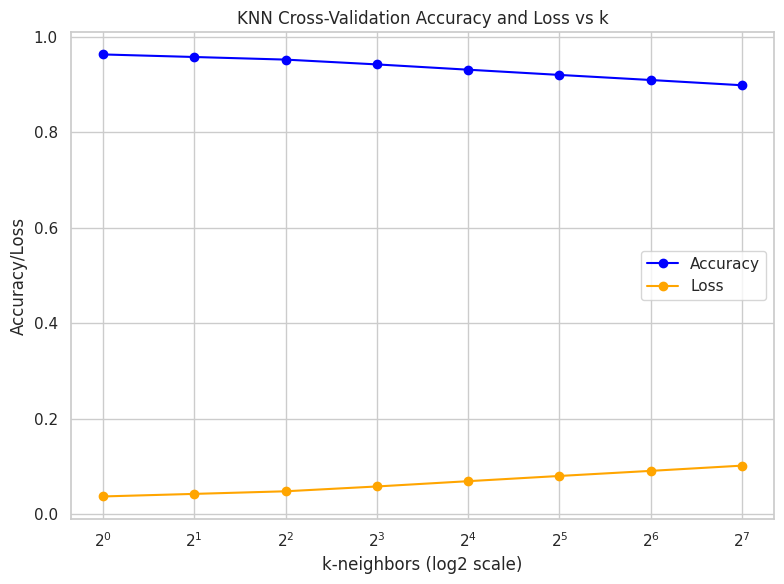

In [50]:
results_knn_loss_plot = knn_gridsearch_cv_plot_loss(X_train_resampled, y_train_resampled)

=== KNN Cross-Validation Grid Search ===
PCA enabled: Retained 3 components explaining 95% variance.
k=1: CV Mean Accuracy=0.9046
k=2: CV Mean Accuracy=0.8921
k=4: CV Mean Accuracy=0.8950
k=8: CV Mean Accuracy=0.8875
k=16: CV Mean Accuracy=0.8766
k=32: CV Mean Accuracy=0.8659
k=64: CV Mean Accuracy=0.8547
k=128: CV Mean Accuracy=0.8451


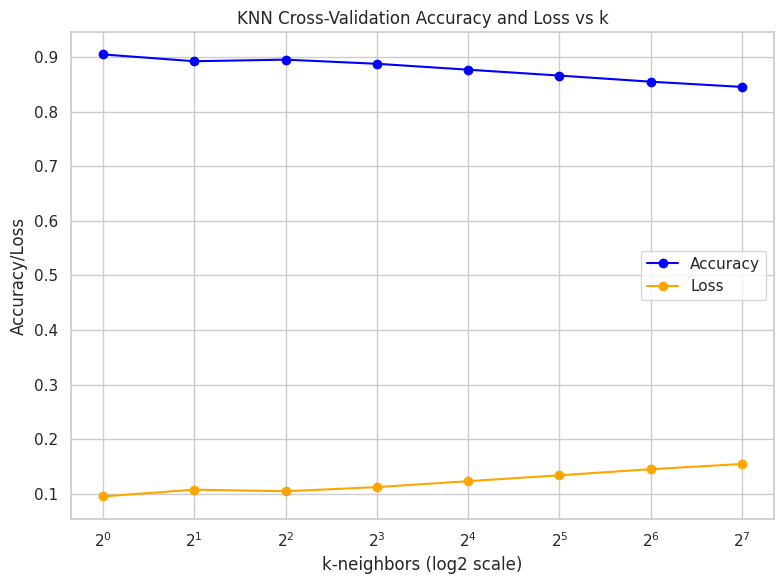

In [51]:
results_knn_loss_plot = knn_gridsearch_cv_plot_loss(X_train_resampled, y_train_resampled, use_pca=True)

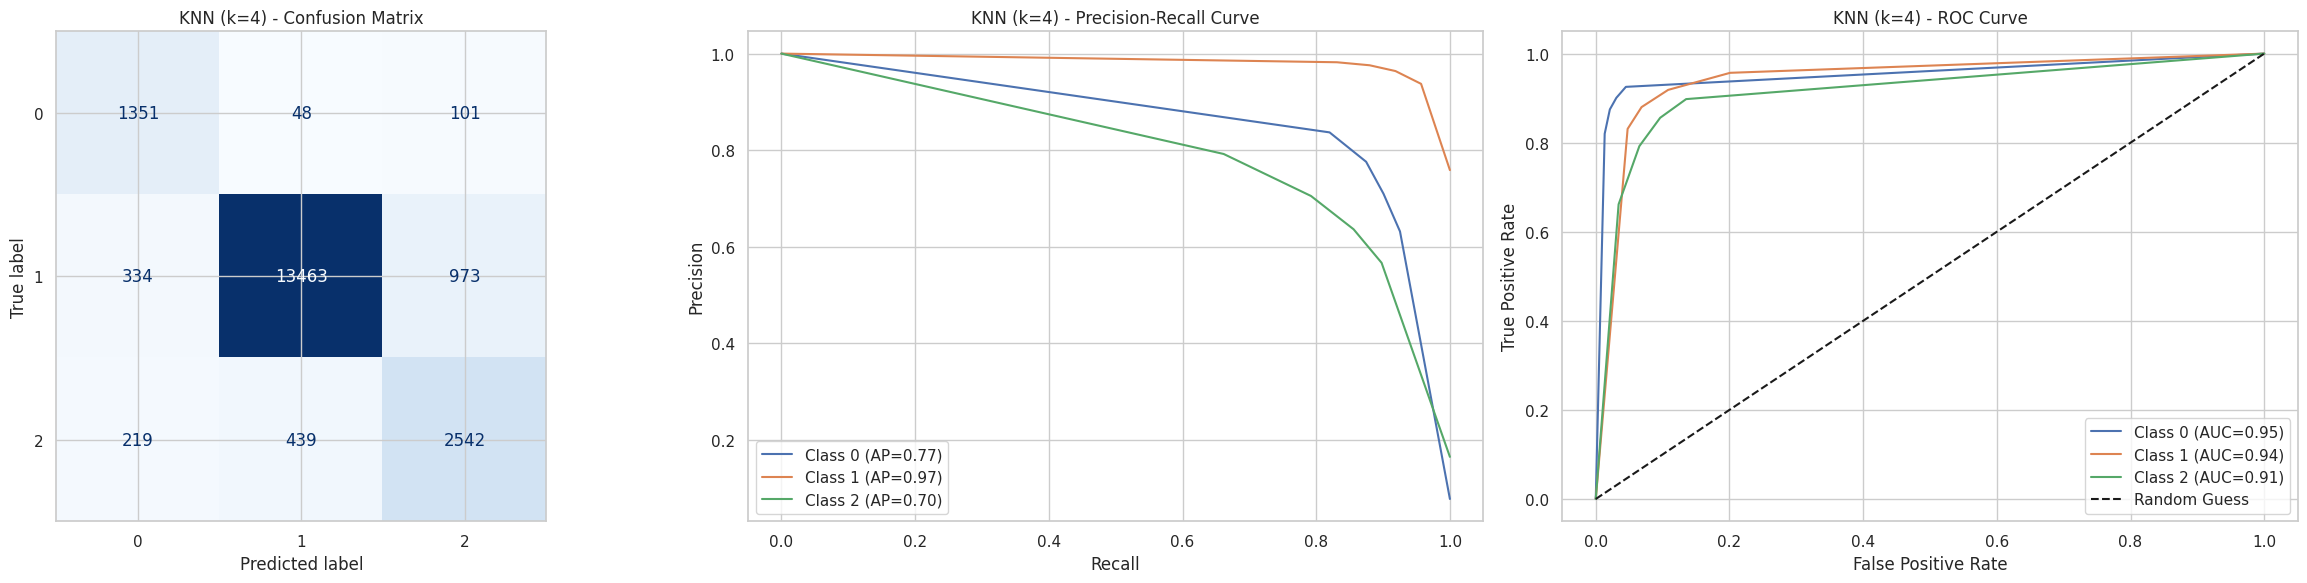

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                              precision_recall_curve, roc_curve, auc,
                              average_precision_score)
from sklearn.preprocessing import label_binarize

def plot_knn_all(X_train, y_train, X_test, y_test, k=4):
    # --- 训练KNN ---
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_score = knn.predict_proba(X_test)

    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    # --- 创建画布 ---
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # === 1. Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
    axes[0].set_title(f"KNN (k={k}) - Confusion Matrix")

    # === 2. Precision-Recall Curve ===
    for i, cls in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
        axes[1].plot(recall, precision, label=f'Class {cls} (AP={ap:.2f})')

    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title(f"KNN (k={k}) - Precision-Recall Curve")
    axes[1].legend()
    axes[1].grid(True)

    # === 3. ROC Curve ===
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        axes[2].plot(fpr, tpr, label=f'Class {cls} (AUC={roc_auc:.2f})')

    axes[2].plot([0, 1], [0, 1], 'k--', label='Random Guess')
    axes[2].set_xlabel('False Positive Rate')
    axes[2].set_ylabel('True Positive Rate')
    axes[2].set_title(f"KNN (k={k}) - ROC Curve")
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    save_fig("knn_all")
    plt.show()

# --- 调用 ---
plot_knn_all(X_train_resampled, y_train_resampled, X_test, y_test, k=4)

In [122]:
# results_knn_loss_plot = knn_gridsearch_cv_plot_loss(X_train_resampled, y_train_resampled)


=== KNN Performance ===
Accuracy: 0.8916
Precision (macro avg): 0.7972
Recall (macro avg): 0.8472
F1-Score (macro avg): 0.8184


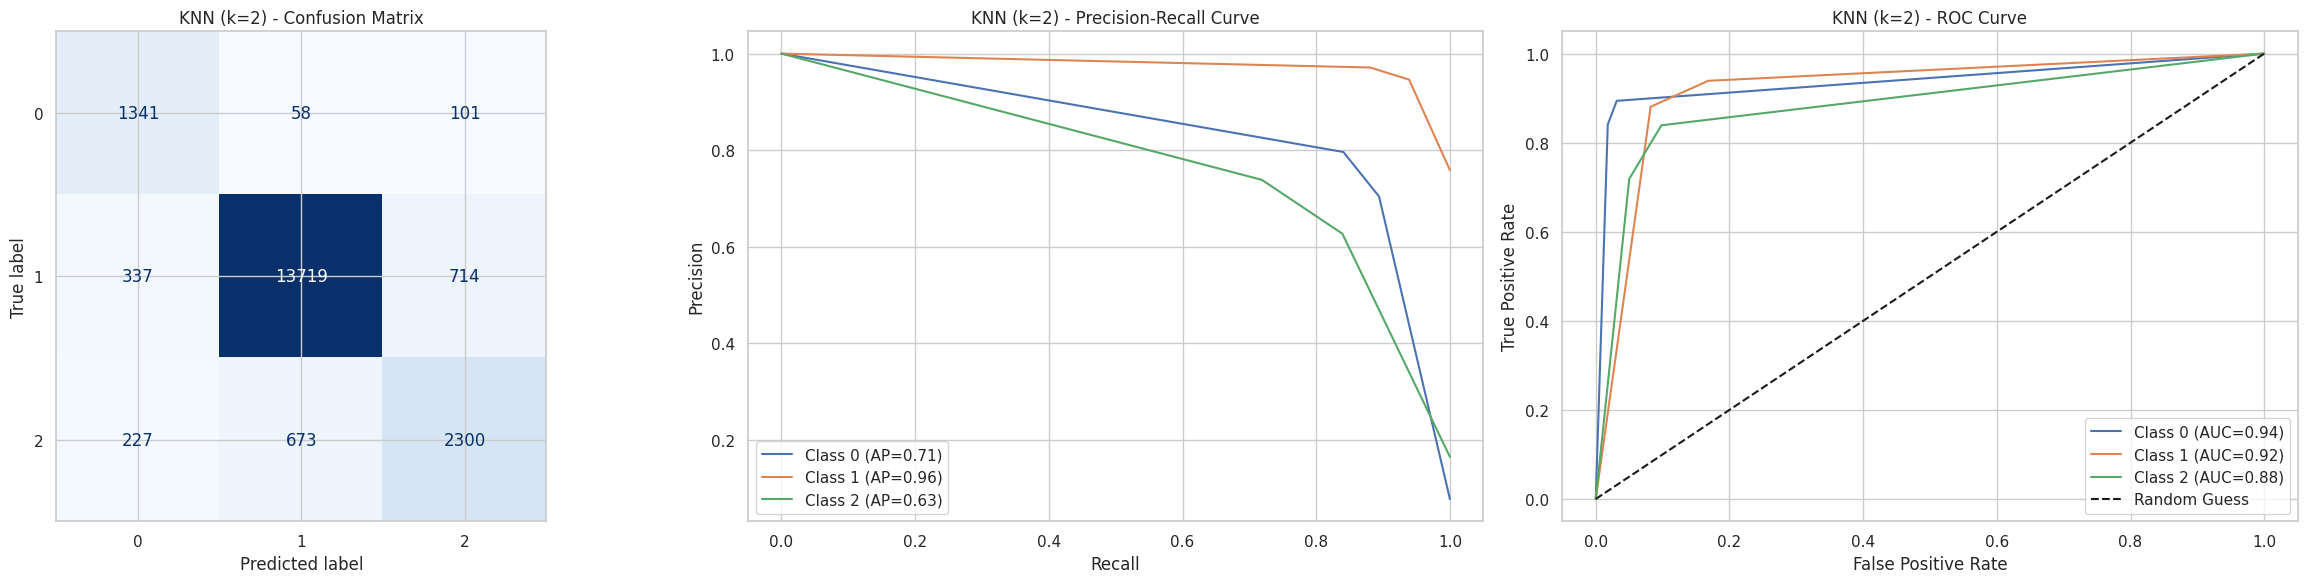

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                              precision_recall_curve, roc_curve, auc,
                              average_precision_score,
                              accuracy_score, precision_score, recall_score, f1_score)  # ← 增加引入这四个指标
from sklearn.preprocessing import label_binarize

def plot_knn_all(X_train, y_train, X_test, y_test, k=2):
    # --- 训练KNN ---
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_score = knn.predict_proba(X_test)

    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    # === 这里新增：计算整体指标 ===
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("\n=== KNN Performance ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro avg): {prec:.4f}")
    print(f"Recall (macro avg): {rec:.4f}")
    print(f"F1-Score (macro avg): {f1:.4f}")

    # --- 创建画布 ---
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    # === 1. Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
    axes[0].set_title(f"KNN (k={k}) - Confusion Matrix")

    # === 2. Precision-Recall Curve ===
    for i, cls in enumerate(classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
        axes[1].plot(recall, precision, label=f'Class {cls} (AP={ap:.2f})')

    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title(f"KNN (k={k}) - Precision-Recall Curve")
    axes[1].legend()
    axes[1].grid(True)

    # === 3. ROC Curve ===
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        axes[2].plot(fpr, tpr, label=f'Class {cls} (AUC={roc_auc:.2f})')

    axes[2].plot([0, 1], [0, 1], 'k--', label='Random Guess')
    axes[2].set_xlabel('False Positive Rate')
    axes[2].set_ylabel('True Positive Rate')
    axes[2].set_title(f"KNN (k={k}) - ROC Curve")
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    save_fig("knn_all")  # 如果你有 save_fig 函数
    plt.show()

# --- 调用 ---
plot_knn_all(X_train_resampled, y_train_resampled, X_test, y_test, k=2)

## 4.XGBoost/LightGBM

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

def xgboost_gridsearch_cv(X_train, y_train,
                           max_depth_list=[3, 5, 7],
                           learning_rate_list=[0.01, 0.05, 0.1],
                           cv_folds=5,
                            use_pca=False):
    if use_pca:
      pca = PCA(n_components=0.95,random_state=42)
      X_train = pca.fit_transform(X_train)
      print(f"PCA enabled: Retained {X_train.shape[1]} components explaining 95% variance.")

    results = []

    print("=== XGBoost Cross-Validation Grid Search ===")
    for depth in max_depth_list:
        for lr in learning_rate_list:
            model = XGBClassifier(
                max_depth=depth,
                learning_rate=lr,
                n_estimators=100,
                objective='multi:softmax',  # 多分类问题
                num_class=3,                # 三类别 (0,1,2)
                use_label_encoder=False,
                eval_metric='mlogloss',
                random_state=42,
                n_jobs=-1
            )

            scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
            mean_acc = scores.mean()
            mean_loss = 1 - mean_acc

            print(f"max_depth={depth}, learning_rate={lr}: CV Mean Accuracy={mean_acc:.4f}")

            results.append({
                'max_depth': depth,
                'learning_rate': lr,
                'CV_Mean_Accuracy': mean_acc,
                'CV_Mean_Loss': mean_loss
            })

    results_df = pd.DataFrame(results)

    # --- 绘图 ---
    for metric in ['CV_Mean_Accuracy', 'CV_Mean_Loss']:
        plt.figure(figsize=(8,6))
        for lr in sorted(results_df['learning_rate'].unique()):
            sub_df = results_df[results_df['learning_rate'] == lr]
            plt.plot(sub_df['max_depth'], sub_df[metric], marker='o', label=f'lr={lr}')

        plt.xlabel('Max Depth')
        plt.ylabel(metric.replace('_', ' '))
        plt.title(f'XGBoost {metric.replace("_", " ")} vs Max Depth')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # --- 最佳组合 ---
    best_row = results_df.loc[results_df['CV_Mean_Accuracy'].idxmax()]
    best_depth = int(best_row['max_depth'])
    best_lr = float(best_row['learning_rate'])
    best_acc = best_row['CV_Mean_Accuracy']

    print("\n=== Best Parameter Combination ===")
    print(f"✅ Best max_depth = {best_depth}, learning_rate = {best_lr} with Cross-Validated Accuracy = {best_acc:.4f}")

    return results_df, (best_depth, best_lr, best_acc)

=== XGBoost Cross-Validation Grid Search ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=3, learning_rate=0.01: CV Mean Accuracy=0.9810


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=3, learning_rate=0.05: CV Mean Accuracy=0.9896


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=3, learning_rate=0.1: CV Mean Accuracy=0.9957


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=5, learning_rate=0.01: CV Mean Accuracy=0.9894


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=5, learning_rate=0.05: CV Mean Accuracy=0.9961


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=5, learning_rate=0.1: CV Mean Accuracy=0.9978


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=7, learning_rate=0.01: CV Mean Accuracy=0.9931


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=7, learning_rate=0.05: CV Mean Accuracy=0.9967


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=7, learning_rate=0.1: CV Mean Accuracy=0.9979


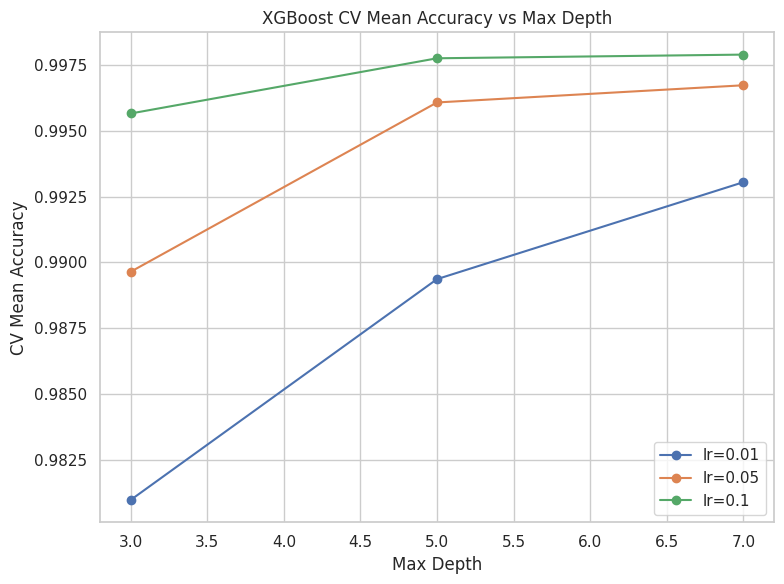

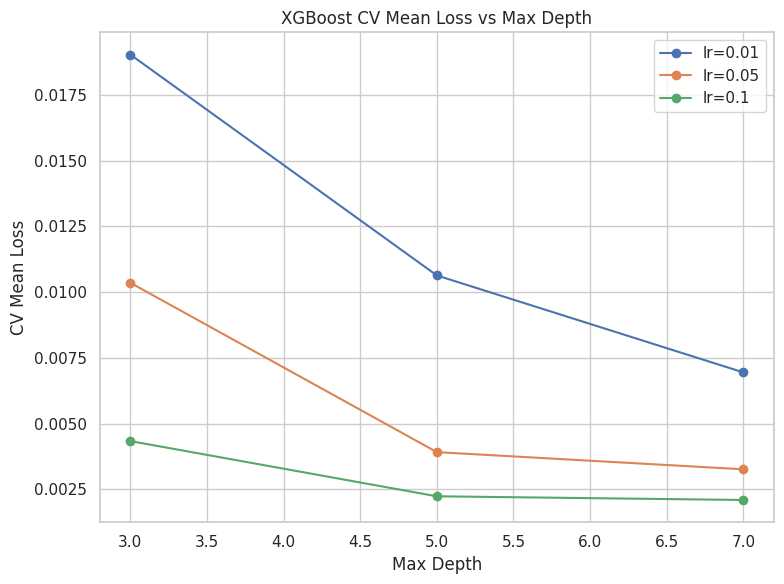


=== Best Parameter Combination ===
✅ Best max_depth = 7, learning_rate = 0.1 with Cross-Validated Accuracy = 0.9979


(   max_depth  learning_rate  CV_Mean_Accuracy  CV_Mean_Loss
 0          3           0.01          0.980974      0.019026
 1          3           0.05          0.989647      0.010353
 2          3           0.10          0.995663      0.004337
 3          5           0.01          0.989368      0.010632
 4          5           0.05          0.996083      0.003917
 5          5           0.10          0.997762      0.002238
 6          7           0.01          0.993052      0.006948
 7          7           0.05          0.996736      0.003264
 8          7           0.10          0.997902      0.002098,
 (7, 0.1, np.float64(0.9979015543928759)))

In [76]:
xgboost_gridsearch_cv(X_train_resampled, y_train_resampled)

PCA enabled: Retained 3 components explaining 95% variance.
=== XGBoost Cross-Validation Grid Search ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=3, learning_rate=0.01: CV Mean Accuracy=0.9466


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=3, learning_rate=0.05: CV Mean Accuracy=0.9537


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=3, learning_rate=0.1: CV Mean Accuracy=0.9580


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=5, learning_rate=0.01: CV Mean Accuracy=0.9576


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=5, learning_rate=0.05: CV Mean Accuracy=0.9626


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=5, learning_rate=0.1: CV Mean Accuracy=0.9653


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=7, learning_rate=0.01: CV Mean Accuracy=0.9632


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=7, learning_rate=0.05: CV Mean Accuracy=0.9672


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

max_depth=7, learning_rate=0.1: CV Mean Accuracy=0.9678


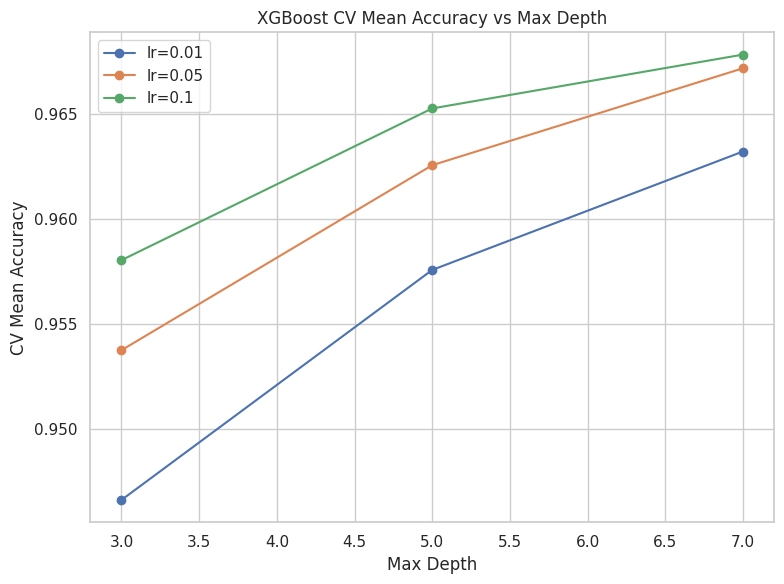

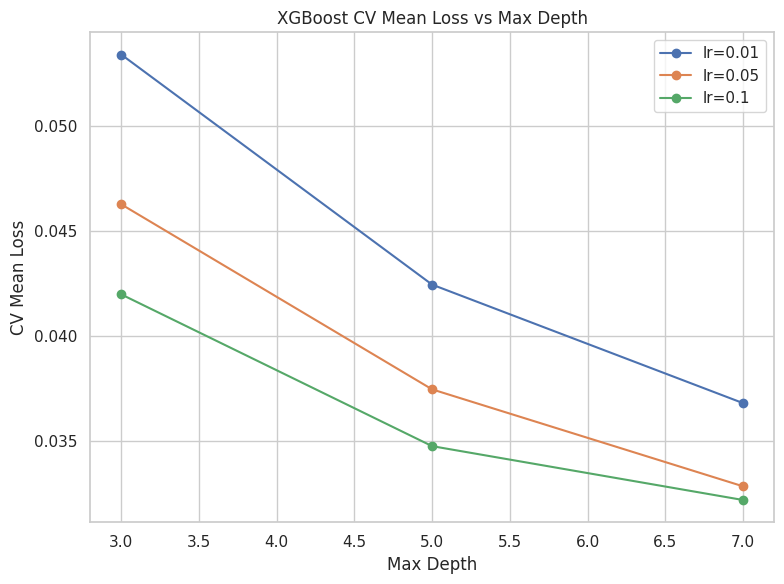


=== Best Parameter Combination ===
✅ Best max_depth = 7, learning_rate = 0.1 with Cross-Validated Accuracy = 0.9678


(   max_depth  learning_rate  CV_Mean_Accuracy  CV_Mean_Loss
 0          3           0.01          0.946605      0.053395
 1          3           0.05          0.953740      0.046260
 2          3           0.10          0.958030      0.041970
 3          5           0.01          0.957564      0.042436
 4          5           0.05          0.962554      0.037446
 5          5           0.10          0.965258      0.034742
 6          7           0.01          0.963206      0.036794
 7          7           0.05          0.967170      0.032830
 8          7           0.10          0.967823      0.032177,
 (7, 0.1, np.float64(0.9678232540375762)))

In [77]:
xgboost_gridsearch_cv(X_train_resampled, y_train_resampled, use_pca=True)

In [60]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def evaluate_xgboost_on_test(X_train, y_train, X_test, y_test, max_depth=7, learning_rate=0.1):

    # --- 训练 XGBoost ---
    model = xgb.XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=100,
        objective='multi:softprob',
        num_class=3,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    # --- 预测 ---
    y_pred = model.predict(X_test)

    # --- 计算 Performance ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("\n=== XGBoost Performance on Test Set ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro avg): {prec:.4f}")
    print(f"Recall (macro avg): {rec:.4f}")
    print(f"F1-Score (macro avg): {f1:.4f}")

    # --- 混淆矩阵 ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title('XGBoost - Confusion Matrix')
    plt.show()

    # --- 分类报告（可选，输出每一类的精细指标）---
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    return model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:10:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Performance on Test Set ===
Accuracy: 0.9789
Precision (macro avg): 0.9591
Recall (macro avg): 0.9824
F1-Score (macro avg): 0.9703


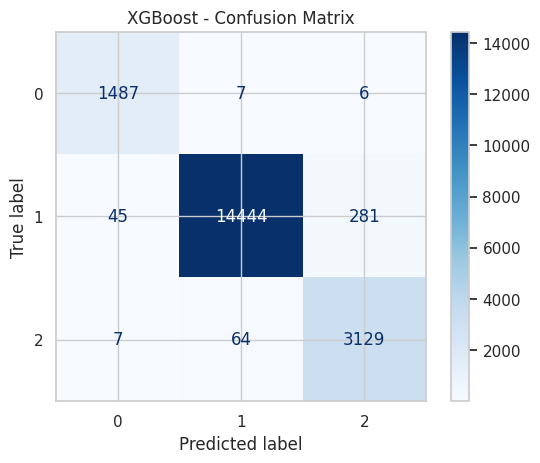


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1500
           1       1.00      0.98      0.99     14770
           2       0.92      0.98      0.95      3200

    accuracy                           0.98     19470
   macro avg       0.96      0.98      0.97     19470
weighted avg       0.98      0.98      0.98     19470



In [61]:
xgb_model = evaluate_xgboost_on_test(X_train_resampled, y_train_resampled, X_test, y_test, max_depth=7, learning_rate=0.1)

##MLP

In [48]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report

# ✅ 固定随机种子（确保可复现）
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# ✅ 定义模型创建函数
def create_mlp(hidden_units=128, dropout_rate=0.3, optimizer='adam', activation='relu'):
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Unsupported optimizer")

    model = Sequential([
        Dense(hidden_units, activation=activation, input_shape=(X_train_resampled.shape[1],)),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ✅ 定义超参数组合
param_grid = [
    {'hidden_units': 64, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
    {'hidden_units': 64, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
    {'hidden_units': 128, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
    {'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
    {'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'},
    {'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'rmsprop', 'activation': 'tanh'},
    {'hidden_units': 256, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'},
    {'hidden_units': 256, 'dropout_rate': 0.4, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
]

# ✅ 手动网格搜索
best_val_acc = 0
best_model = None
best_params = {}

for params in param_grid:
    print(f"\n🔍 Training model with params: {params}")

    # 提取 batch_size，构造模型时不要传入它
    batch_size = params['batch_size']
    params_copy = params.copy()
    del params_copy['batch_size']

    # 创建模型（不传入 batch_size）
    model = create_mlp(**params_copy)

    # 提前停止回调
    es = EarlyStopping(patience=3, restore_best_weights=True)

    # 模型训练
    history = model.fit(
        X_train_resampled, y_train_resampled,
        epochs=20,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[es],
        verbose=0
    )

    val_acc = max(history.history['val_accuracy'])
    print(f"✅ Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_params = params  # 原始params，包含batch_size

# ✅ 测试集评估
y_pred = np.argmax(best_model.predict(X_test), axis=1)
print("\n📊 Best Hyperparameters:")
print(best_params)
print(f"🎯 Best Validation Accuracy: {best_val_acc:.4f}")

print("\n📊 Test Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Training model with params: {'hidden_units': 64, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.7786

🔍 Training model with params: {'hidden_units': 64, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.7051

🔍 Training model with params: {'hidden_units': 128, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.8001

🔍 Training model with params: {'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.6743

🔍 Training model with params: {'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.8369

🔍 Training model with params: {'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'rmsprop', 'activation': 'tanh'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.5309

🔍 Training model with params: {'hidden_units': 256, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.8253

🔍 Training model with params: {'hidden_units': 256, 'dropout_rate': 0.4, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.6535
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Best Hyperparameters:
{'hidden_units': 128, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'}
🎯 Best Validation Accuracy: 0.8369

📊 Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1500
           1       0.97      0.93      0.95     14770
           2       0.73      0.80      0.76      3200

    accuracy                           0.91     19470
   macro avg       0.82      0.89      0.85     19470
weighted avg       0.91      0.91      0.91     19470



Accuracy: 0.9016
Precision (macro avg): 0.8138
Recall (macro avg): 0.8854
F1-Score (macro avg): 0.8456


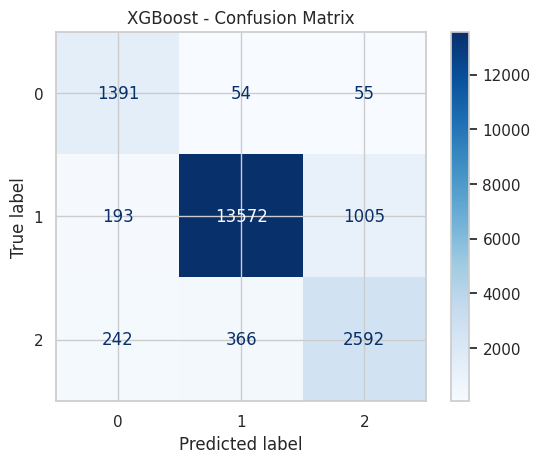


Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1500
           1       0.97      0.92      0.94     14770
           2       0.71      0.81      0.76      3200

    accuracy                           0.90     19470
   macro avg       0.81      0.89      0.85     19470
weighted avg       0.91      0.90      0.90     19470



In [65]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro avg): {prec:.4f}")
print(f"Recall (macro avg): {rec:.4f}")
print(f"F1-Score (macro avg): {f1:.4f}")

# --- 混淆矩阵 ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# --- 分类报告（可选，输出每一类的精细指标）---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

## CNN

In [69]:
# Re-import required libraries after code execution state reset
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define CNN model function
def create_cnn(filters=32, kernel_size=3, dropout_rate=0.3, optimizer='adam', activation='relu'):
    if optimizer == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Unsupported optimizer")

    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation=activation),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Parameter grid
param_grid = [
    # 基础组合
    {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
    {'filters': 64, 'kernel_size': 5, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'},
    {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.4, 'batch_size': 32, 'optimizer': 'rmsprop', 'activation': 'tanh'},

    # 扩展组合
    {'filters': 128, 'kernel_size': 3, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'},
    {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.2, 'batch_size': 64, 'optimizer': 'rmsprop', 'activation': 'relu'},
    {'filters': 32, 'kernel_size': 5, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'tanh'},
    {'filters': 128, 'kernel_size': 5, 'dropout_rate': 0.4, 'batch_size': 64, 'optimizer': 'rmsprop', 'activation': 'relu'},
    {'filters': 64, 'kernel_size': 7, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'},
    {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.25, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'tanh'},
    {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.35, 'batch_size': 128, 'optimizer': 'rmsprop', 'activation': 'relu'},
]

# Grid search loop
best_val_acc = 0
best_model = None
best_params = {}

for params in param_grid:
    print(f"\n🔍 Training CNN with params: {params}")
    batch_size = params['batch_size']
    params_copy = params.copy()
    del params_copy['batch_size']

    model = create_cnn(**params_copy)
    es = EarlyStopping(patience=3, restore_best_weights=True)
    history = model.fit(X_train_resampled, y_train_resampled,
                        epochs=20,
                        batch_size=batch_size,
                        validation_split=0.2,
                        callbacks=[es],
                        verbose=0)

    val_acc = max(history.history['val_accuracy'])
    print(f"✅ Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_params = params

# Evaluate on test set
y_pred = np.argmax(best_model.predict(X_test), axis=1)
report = classification_report(y_test, y_pred)
(best_params, best_val_acc, report)



🔍 Training CNN with params: {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Validation Accuracy: 0.3812

🔍 Training CNN with params: {'filters': 64, 'kernel_size': 5, 'dropout_rate': 0.3, 'batch_size': 64, 'optimizer': 'adam', 'activation': 'relu'}
✅ Validation Accuracy: 0.3812

🔍 Training CNN with params: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.4, 'batch_size': 32, 'optimizer': 'rmsprop', 'activation': 'tanh'}
✅ Validation Accuracy: 0.3375

🔍 Training CNN with params: {'filters': 128, 'kernel_size': 3, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu'}
✅ Validation Accuracy: 0.3812

🔍 Training CNN with params: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.2, 'batch_size': 64, 'optimizer': 'rmsprop', 'activation': 'relu'}
✅ Validation Accuracy: 0.4313

🔍 Training CNN with params: {'filters': 32, 'kernel_size': 5, 'dropout_rate': 0.3, 'batch_size': 32, 'optimizer': 'adam', 'activation': 'tanh'}
✅ Validation Accuracy: 0.3812

🔍 Training CNN with params: {'filters': 128, 'kernel_size': 5, 'dropout_rate': 0.4, 'ba

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'filters': 64,
  'kernel_size': 3,
  'dropout_rate': 0.2,
  'batch_size': 64,
  'optimizer': 'rmsprop',
  'activation': 'relu'},
 0.4312500059604645,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        71\n           1       0.29      1.00      0.45        58\n           2       0.00      0.00      0.00        71\n\n    accuracy                           0.29       200\n   macro avg       0.10      0.33      0.15       200\nweighted avg       0.08      0.29      0.13       200\n')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.2900
Precision (macro avg): 0.0967
Recall (macro avg): 0.3333
F1-Score (macro avg): 0.1499


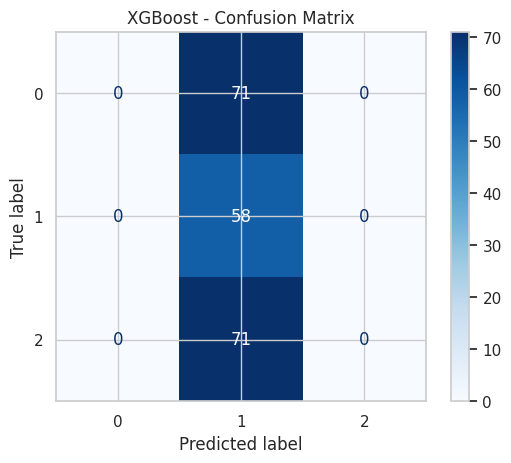


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.29      1.00      0.45        58
           2       0.00      0.00      0.00        71

    accuracy                           0.29       200
   macro avg       0.10      0.33      0.15       200
weighted avg       0.08      0.29      0.13       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro avg): {prec:.4f}")
print(f"Recall (macro avg): {rec:.4f}")
print(f"F1-Score (macro avg): {f1:.4f}")

# --- 混淆矩阵 ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# --- 分类报告（可选，输出每一类的精细指标）---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn_model(input_shape=(64, 64, 3), num_classes=3):
    model = Sequential()

    # --- Convolutional Layer 1 ---
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # --- Convolutional Layer 2 ---
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # --- Convolutional Layer 3 ---
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # --- Flatten and Dense Layers ---
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes, activation='softmax'))

    # --- Compile ---
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
cnn_model = build_cnn_model(input_shape=(64, 64, 3), num_classes=3)
cnn_model.summary()